# SkillFusionX

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("players_fifa23.csv")
data.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [4]:
data.shape

(18539, 90)

In [5]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


data = data[needed_columns]

# Data Preprocessing:

<h3>1. Handle the missing values:</h3>

In [6]:
data.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75,96,20,35,24,6,11,15,14,8
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80,88,26,34,32,13,5,7,11,6


In [7]:
print("The percentage of the null values is: ", (data["ContractUntil"].isnull().sum()/data.shape[0])*100, "%")

The percentage of the null values is:  0.49625114623226707 %


As the percentage of nulls is small so we can drop the values of nulls in that column.

In [8]:
data.drop(data[data["ContractUntil"].isnull()].index, axis = 0, inplace =True)

In [9]:
data["ContractUntil"].isnull().sum()

0

<h3>2. Handle The Categorical Columns:</h3>

In [10]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)

Name
BestPosition
Club
PreferredFoot
Nationality
AttackingWorkRate
DefensiveWorkRate


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["PreferredFoot"] = le.fit_transform(data["PreferredFoot"])
data["AttackingWorkRate"] = le.fit_transform(data["AttackingWorkRate"])
data["DefensiveWorkRate"] = le.fit_transform(data["DefensiveWorkRate"])
data["Club"] = le.fit_transform(data["Club"])


<h3>Merge Some Players Positions to reduce the number of classes:</h3>

In [12]:
merge_pos = {'LWB' : 'LW', 'RWB': 'RW', 'ST': 'CF', 'CAM': 'CM', 'CDM': 'CM'}

data = data.replace({'BestPosition': merge_pos})

In [13]:
mapping = {'CF': 0, 'CM': 1, 'RW': 2, 'GK': 3, 'CB': 4, 'LW': 5, 'LM': 6, 'LB': 7,'RM': 8, 'RB': 9}

data = data.replace({'BestPosition': mapping})
data

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75,96,20,35,24,6,11,15,14,8
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80,88,26,34,32,13,5,7,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,243725,D. Collins,21,174,68,47,56,9,1287,274,...,40,47,39,29,27,6,9,5,13,8
18535,261933,Yang Dejiang,17,175,60,47,57,10,1289,267,...,33,45,46,50,52,6,12,11,8,6
18536,267823,L. Mullan,18,170,65,47,67,20,1333,277,...,43,59,39,37,48,11,12,8,7,12
18537,267824,D. McCallion,17,178,65,47,61,14,1113,226,...,37,41,50,54,54,8,14,13,7,8


In [14]:
data = pd.DataFrame(data)

data.to_csv("players_fifa23_cleaned.csv", index=False)

# Split the Data to Train and Test sets:

In [15]:
X = data.drop(["BestPosition", "Nationality", "ID"], axis = 1)
Y = pd.DataFrame(data["BestPosition"])



In [16]:
top = data.sort_values(by=["Overall"], ascending=False).head(20)

In [17]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [18]:
X_Train = X_Train.drop(["Name"], axis = 1)
test_names = X_Test["Name"]
X_Test = X_Test.drop(["Name"], axis = 1)

top_pos = top["BestPosition"]
top_names = top["Name"]
top = top.drop(["Name", "BestPosition", "Nationality", "ID"], axis = 1)
top

,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,Club,ValueEUR,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,35,169,67,91,91,0,2190,452,453,54000000,...,75,96,20,35,24,6,11,15,14,8
2,33,185,81,91,91,0,2205,458,230,84000000,...,90,88,35,42,19,15,6,12,8,10
3,31,181,70,91,91,0,2303,483,399,107500000,...,83,89,68,65,53,15,13,5,10,13
4,23,182,73,91,95,4,2177,470,453,190500000,...,80,88,26,34,32,13,5,7,11,6
1,34,185,81,91,91,0,2147,455,494,64000000,...,84,90,43,24,18,13,11,5,5,7
5,30,175,71,90,90,0,2226,471,388,115500000,...,86,92,38,43,41,14,14,9,11,14
6,30,199,96,90,91,1,1334,473,494,90000000,...,27,66,20,18,16,84,89,75,89,90
7,36,193,93,90,90,0,1535,501,232,13500000,...,47,70,17,10,11,87,88,91,91,88
8,37,187,83,90,90,0,2159,445,400,41000000,...,90,95,24,32,24,7,11,15,14,11
9,30,193,92,90,90,0,2117,461,388,98000000,...,62,90,92,92,86,13,10,13,11,11


<Axes: xlabel='BestPosition', ylabel='count'>

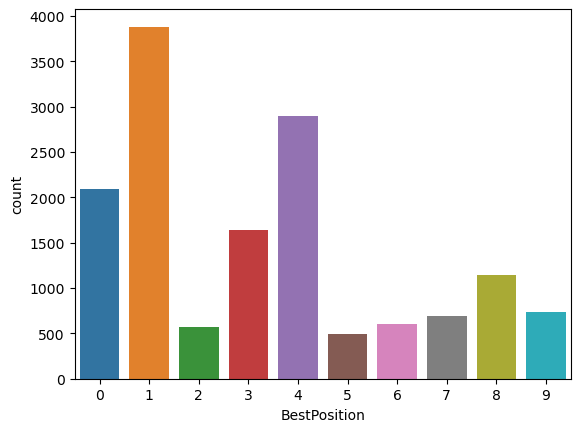

In [19]:
sns.countplot(x="BestPosition", data = Y_Train)

In [20]:
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling  import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)

In [21]:
print(f' X_shape: {X_Train.shape} \n y_shape: {Y_Train.shape}')

 X_shape: (27916, 61) 
 y_shape: (27916, 1)


<Axes: xlabel='BestPosition', ylabel='count'>

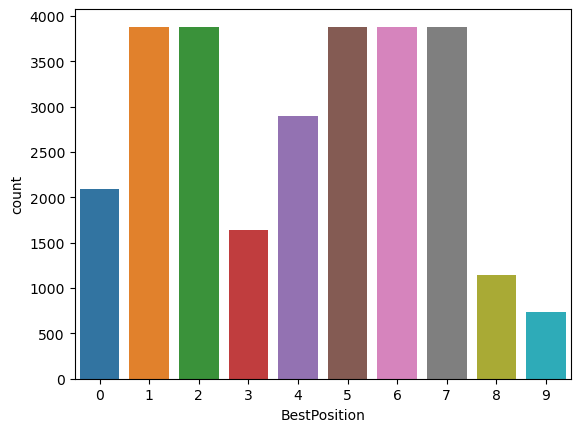

In [22]:
sns.countplot(x="BestPosition", data = Y_Train)


In [23]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_Train = mms.fit_transform(X_Train)
X_Test = mms.fit_transform(X_Test)

top = mms.fit_transform(top)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))
    
models_names = []
models_scores = []
models_auc_scores = []

In [25]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr


In [26]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list


In [27]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


In [28]:
def draw_pco(Y_Proba, classes):
    # Plots the Probability Distributions and the ROC Curves One vs Rest
    plt.figure(figsize = (12, 8))
    bins = [i/20 for i in range(20)] + [1]
    roc_auc_ovr = {}
    
    for i in range(len(classes)):
        # Gets the class
        c = classes[i]

        # Prepares an auxiliar dataframe to help with the plots
        #df_aux = X_Test.copy()
        df_aux = pd.DataFrame()
        df_aux['class'] = [1 if list(mapping.keys())[list(mapping.values()).index(y)] == c else 0 for y in Y_Test.values]
        df_aux['prob'] = Y_Proba[:, i]
        df_aux = df_aux.reset_index(drop = True)

        # Plots the probability distribution for the class and the rest
        ax = plt.subplot(2, 3, i+1)
        sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
        ax.set_title(c)
        ax.legend([f"Class: {c}", "Rest"])
        ax.set_xlabel(f"P(x = {c})")

        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 3, i+4)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
        ax_bottom.set_title("ROC Curve OvR")

        # Calculates the ROC AUC OvR
        roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

    plt.tight_layout()

In [29]:
positions = ['CF', 'CM', 'RW', 'GK', 'CB', 'LW', 'LM', 'LB','RM', 'RB']
positions

['CF', 'CM', 'RW', 'GK', 'CB', 'LW', 'LM', 'LB', 'RM', 'RB']

# 1.Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [31]:
lr.fit(X_Train , Y_Train)

LogisticRegression()

In [32]:
lr.score(X_Train, Y_Train)

0.6898911018770597

In [33]:
lr.score(X_Test, Y_Test)


0.7669376693766937

In [34]:
Y_Pred_lr = lr.predict(X_Test)
Y_Pred_lr

array([3, 1, 8, ..., 7, 0, 4], dtype=int64)

In [35]:
models_names.append("Logistic Regression")
models_scores.append(lr.score(X_Test, Y_Test))

In [36]:
classification_report_fun("Logistic Regression", Y_Test, Y_Pred_lr)


The Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       529
           1       0.85      0.86      0.86       921
           2       0.24      0.72      0.36       140
           3       1.00      1.00      1.00       404
           4       0.92      0.91      0.91       748
           5       0.26      0.09      0.13       116
           6       0.43      0.63      0.51       191
           7       0.60      0.89      0.71       167
           8       0.81      0.19      0.31       288
           9       0.71      0.19      0.30       186

    accuracy                           0.77      3690
   macro avg       0.68      0.64      0.60      3690
weighted avg       0.81      0.77      0.76      3690



In [37]:
Y_Proba_lr = lr.predict_proba(X_Test)

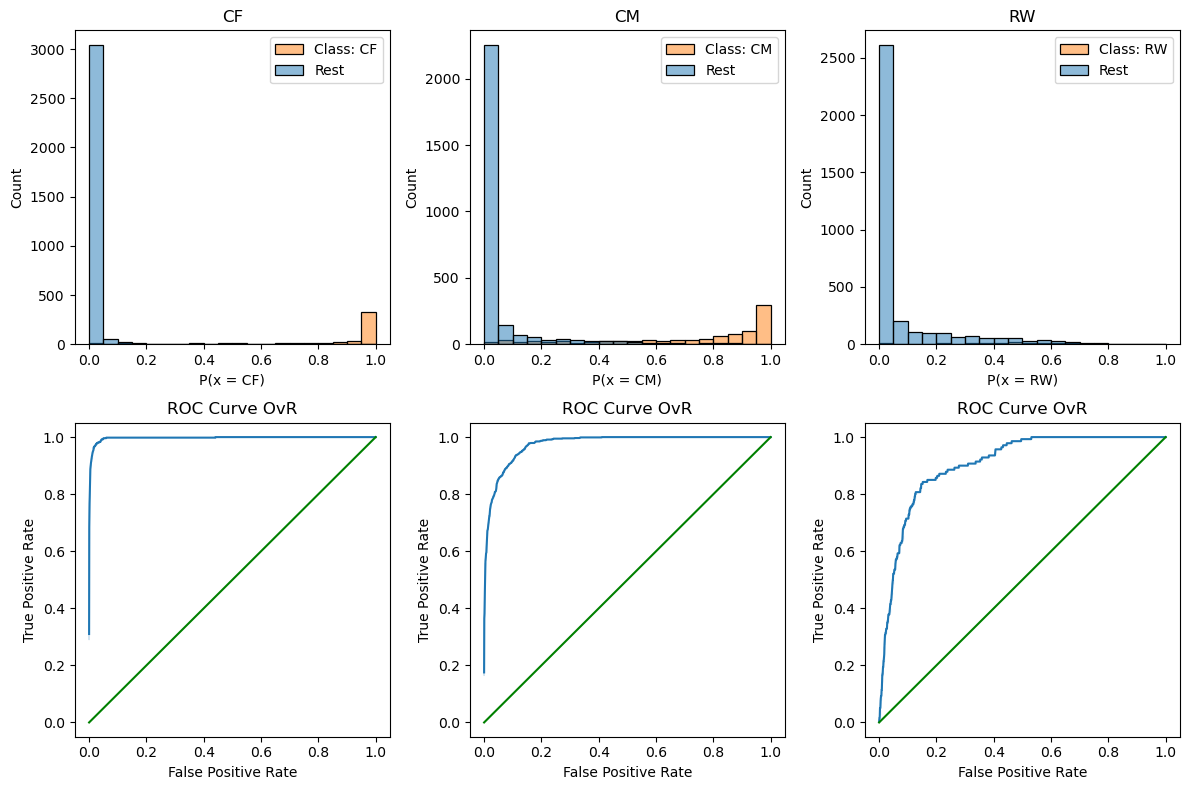

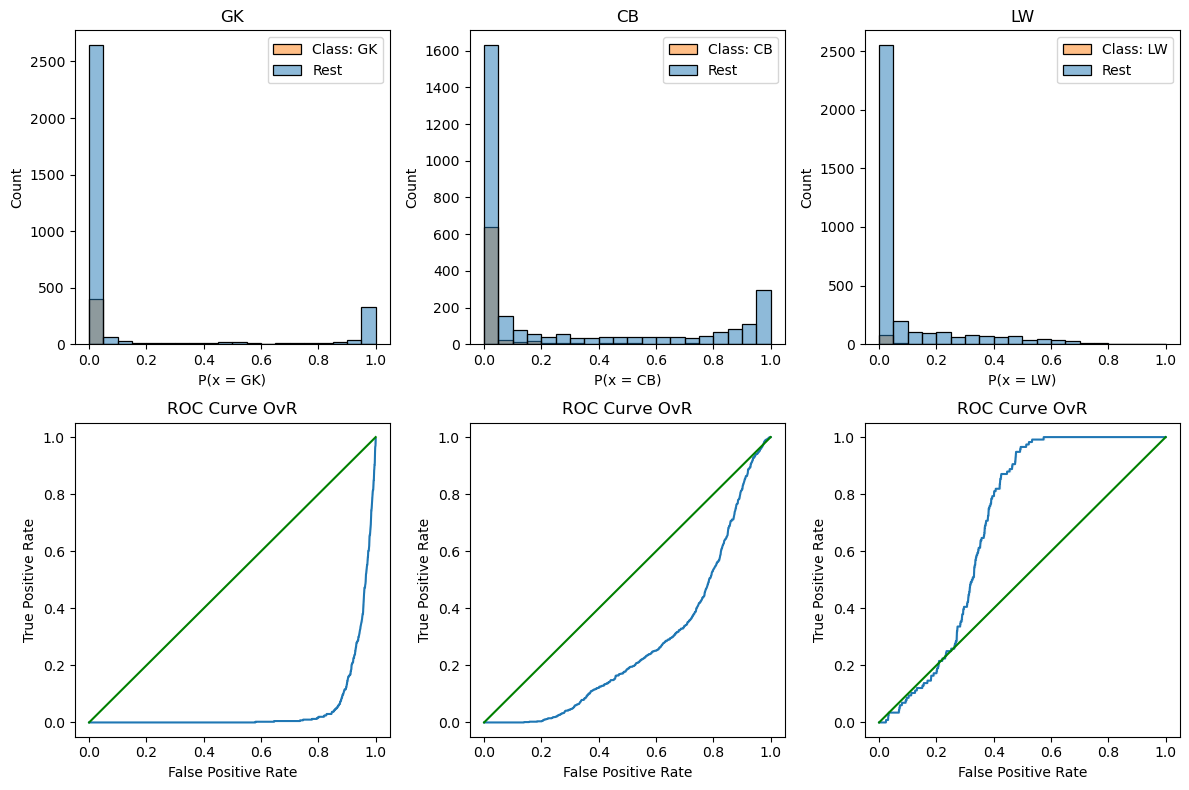

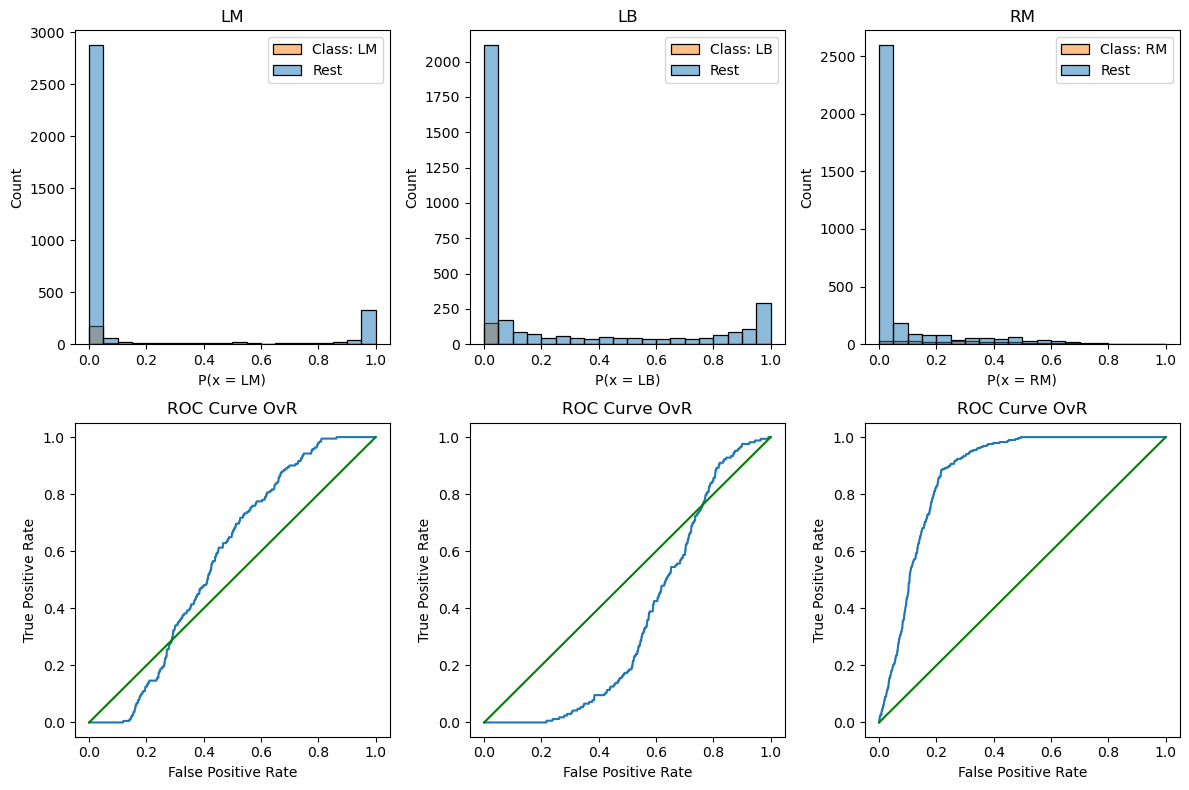

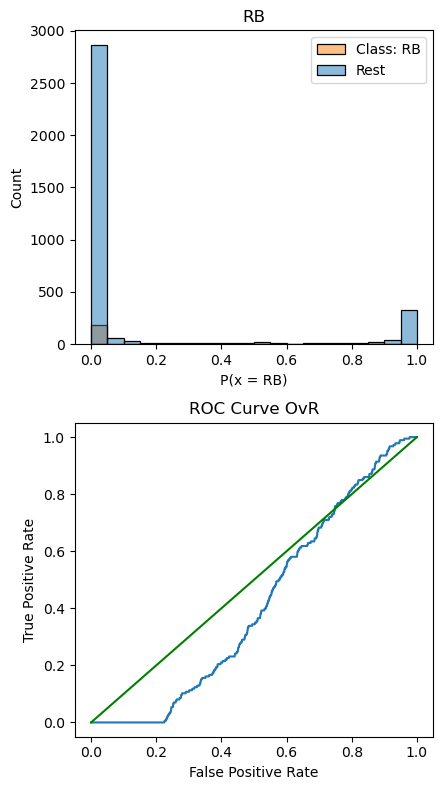

In [38]:
draw_pco(Y_Proba_lr, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_lr, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_lr, ['LM', 'LB','RM'])
draw_pco(Y_Proba_lr, ['RB'])


In [39]:
auc_score_lr = roc_auc_score(Y_Test, Y_Proba_lr, multi_class = 'ovr', average = 'macro')
auc_score_lr

0.9649452025282048

In [40]:
models_auc_scores.append(auc_score_lr)

# 2. Random Forest:

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {
    'n_estimators': [50],
    'criterion': ['gini', 'entropy']
}

In [43]:
rf = RandomForestClassifier()

In [44]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')


In [45]:
grid_search.fit(X_Train, Y_Train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50]},
             scoring='accuracy')

In [46]:
grid_search.score(X_Train, Y_Train)

1.0

In [47]:
grid_search.score(X_Test, Y_Test)

0.7856368563685637

In [48]:
Y_Pred_rf = grid_search.predict(X_Test)

In [49]:
models_names.append("Random Forest")
models_scores.append(grid_search.score(X_Test, Y_Test))

In [50]:
classification_report_fun("Random Forest", Y_Test, Y_Pred_rf)

The Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       529
           1       0.73      0.91      0.81       921
           2       0.40      0.29      0.33       140
           3       1.00      1.00      1.00       404
           4       0.88      0.91      0.89       748
           5       0.43      0.17      0.25       116
           6       0.65      0.42      0.51       191
           7       0.63      0.77      0.70       167
           8       0.68      0.39      0.50       288
           9       0.63      0.52      0.57       186

    accuracy                           0.79      3690
   macro avg       0.69      0.63      0.65      3690
weighted avg       0.77      0.79      0.77      3690



# Use the ROC Curve and ROC AUC to Evaluate the model:

In [51]:
Y_Proba_rf = grid_search.predict_proba(X_Test)

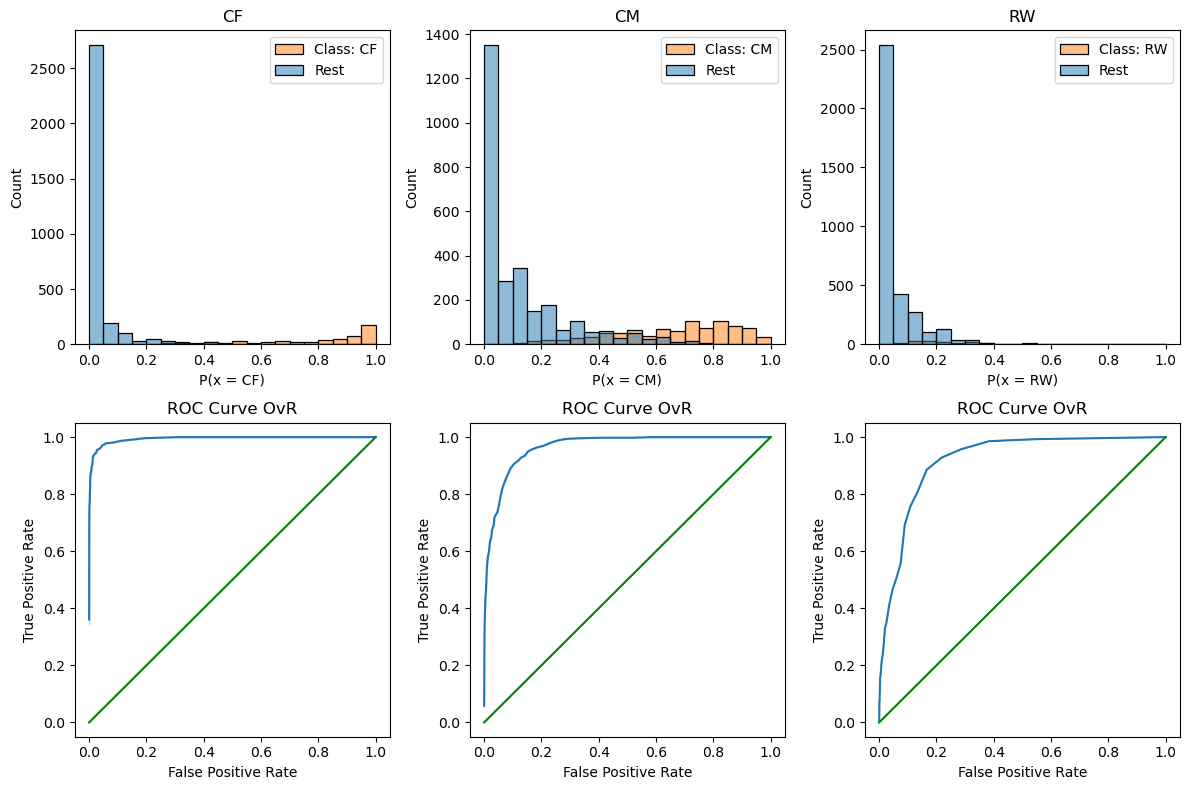

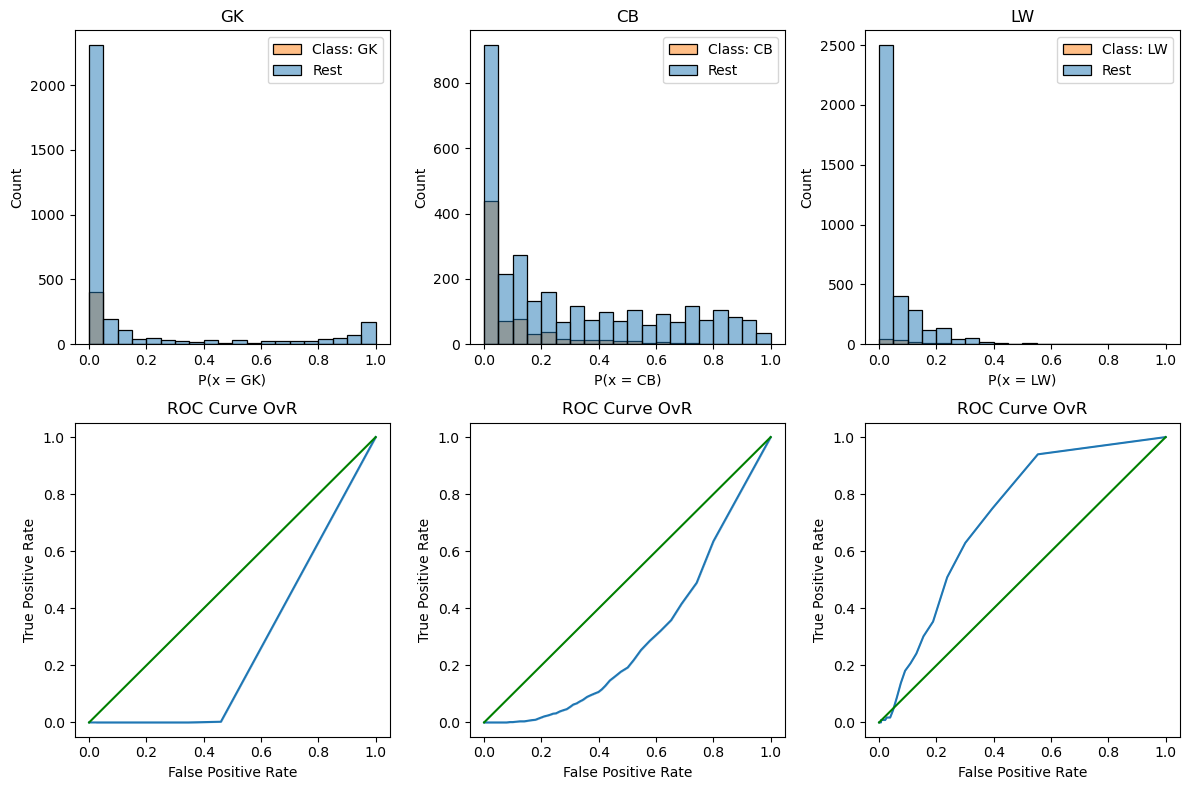

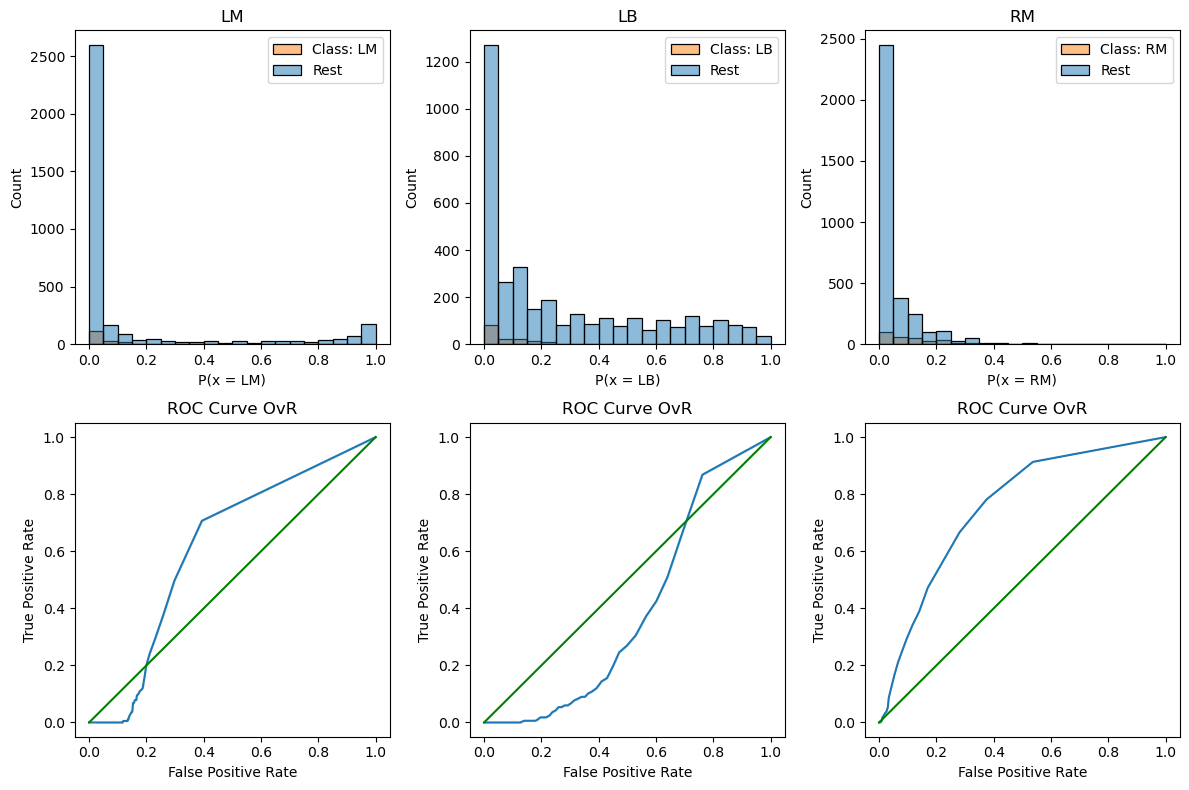

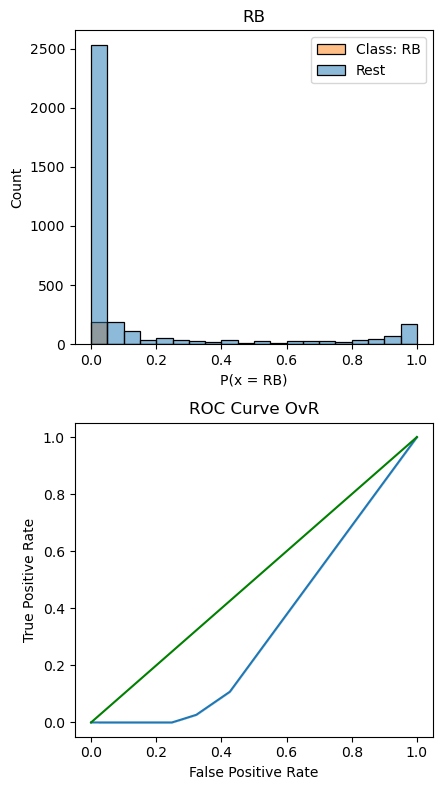

In [52]:
draw_pco(Y_Proba_rf, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_rf, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_rf, ['LM', 'LB','RM'])
draw_pco(Y_Proba_rf, ['RB'])

In [53]:
auc_score_rf = roc_auc_score(Y_Test, Y_Proba_rf, multi_class = 'ovr', average = 'macro')
auc_score_rf

0.9651076484046962

In [54]:
models_auc_scores.append(auc_score_rf)

# 3. Decision Tree:

In [55]:
from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features = 39,max_depth = 10)

In [56]:
dt.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=10, max_features=39)

In [57]:
dt.score(X_Train, Y_Train)

0.7379638916750251

In [58]:
dt.score(X_Test, Y_Test)

0.6476964769647696

In [59]:
Y_Pred_dt = dt.predict(X_Test)

In [60]:
models_names.append("Decision Tree")
models_scores.append(dt.score(X_Test, Y_Test))

In [61]:
classification_report_fun("Decision Tree", Y_Test, Y_Pred_dt)

The Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       529
           1       0.75      0.65      0.70       921
           2       0.18      0.54      0.27       140
           3       1.00      1.00      1.00       404
           4       0.86      0.79      0.82       748
           5       0.17      0.29      0.22       116
           6       0.31      0.61      0.41       191
           7       0.48      0.69      0.56       167
           8       0.54      0.15      0.23       288
           9       0.42      0.14      0.21       186

    accuracy                           0.65      3690
   macro avg       0.56      0.56      0.52      3690
weighted avg       0.71      0.65      0.66      3690



# Use the ROC Curve and ROC AUC to Evaluate the model:

In [62]:
Y_Proba_dt = dt.predict_proba(X_Test)

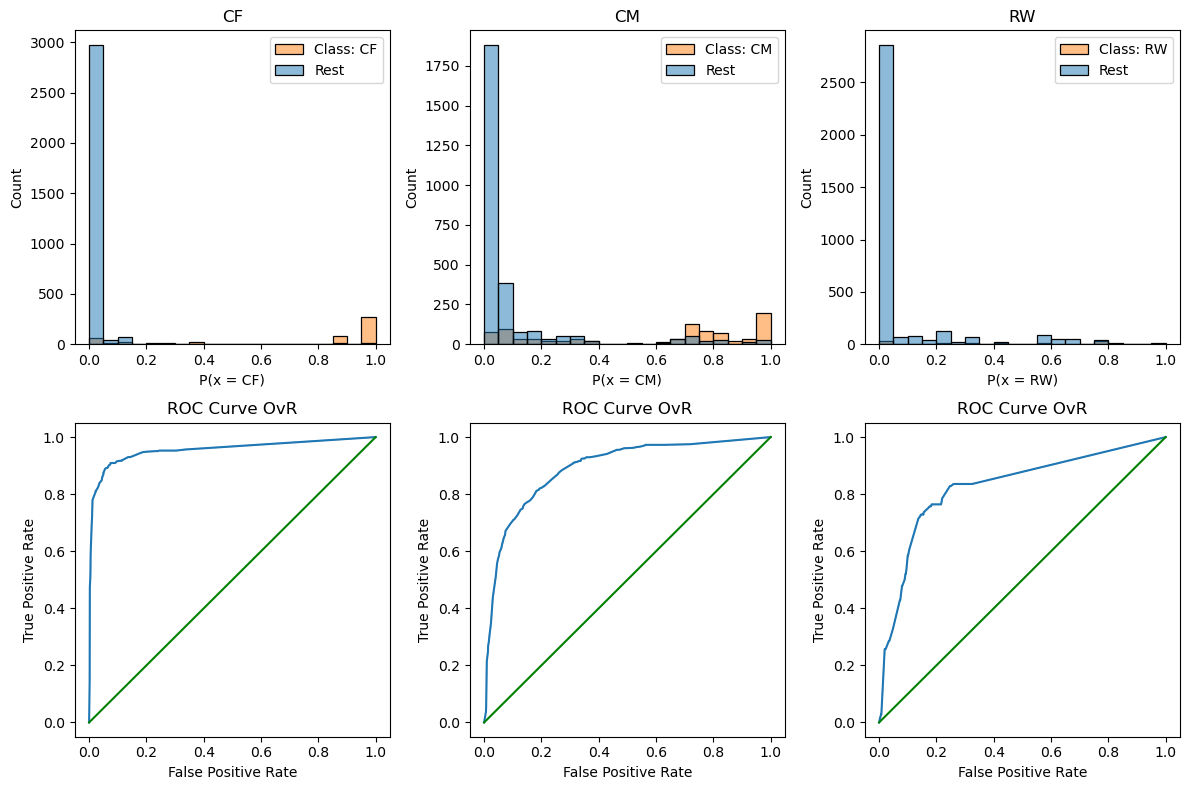

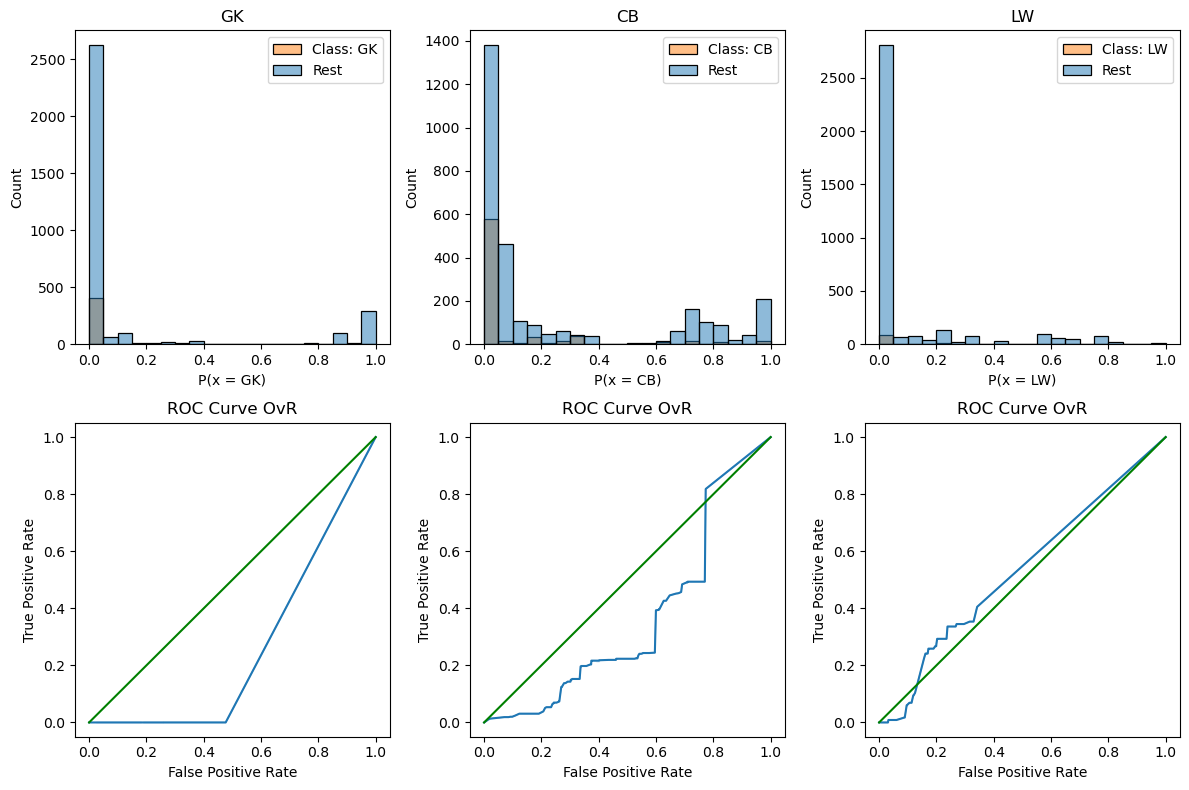

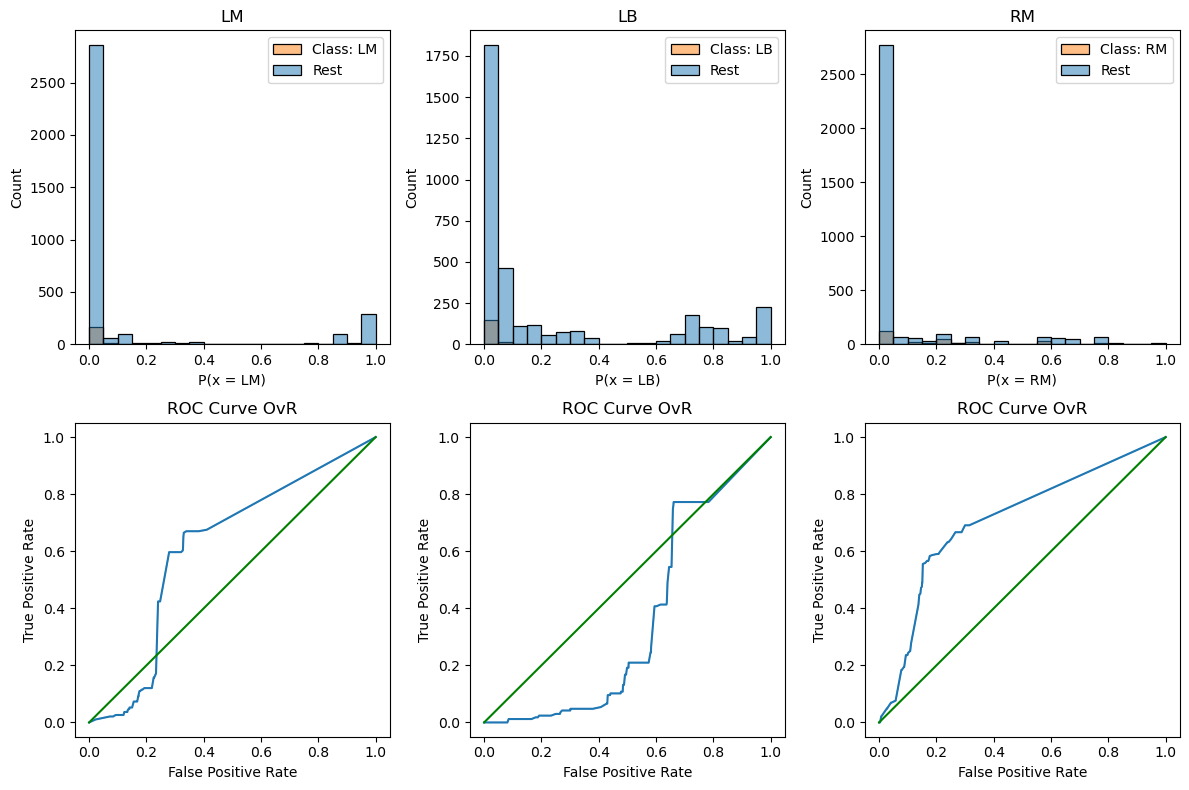

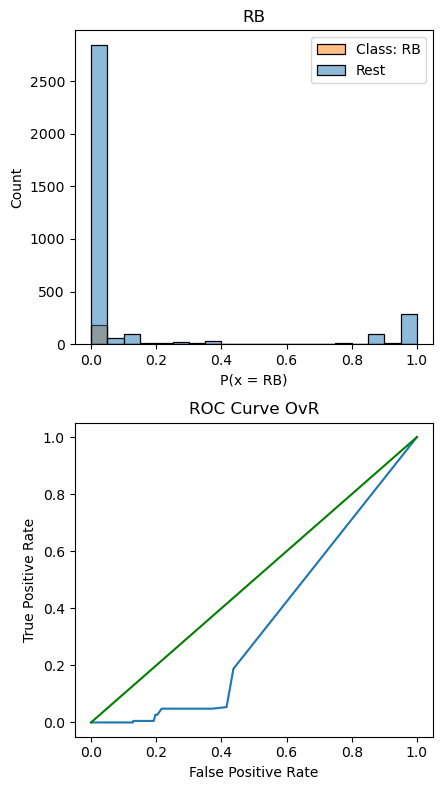

In [63]:
draw_pco(Y_Proba_dt, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_dt, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_dt, ['LM', 'LB','RM'])
draw_pco(Y_Proba_dt, ['RB'])

In [64]:
auc_score_dt = roc_auc_score(Y_Test, Y_Proba_dt, multi_class = 'ovr', average = 'macro')
auc_score_dt

0.9032353446787182

In [65]:
models_auc_scores.append(auc_score_dt)

# 4.AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

In [67]:
ada.fit(X_Train, Y_Train)

AdaBoostClassifier()

In [68]:
ada.score(X_Train, Y_Train)

0.47202321249462675

In [69]:
ada.score(X_Test, Y_Test)

0.6032520325203252

In [70]:
Y_Pred_ada = ada.predict(X_Test)

In [71]:
models_names.append("Adaboost")
models_scores.append(ada.score(X_Test, Y_Test))

In [72]:
classification_report_fun("Adaboost", Y_Test, Y_Pred_ada)

The Classification Report for Adaboost Classifier:
              precision    recall  f1-score   support

           0       0.50      0.95      0.66       529
           1       0.78      0.34      0.47       921
           2       0.13      0.21      0.16       140
           3       1.00      1.00      1.00       404
           4       0.78      0.87      0.82       748
           5       0.22      0.07      0.11       116
           6       0.37      0.32      0.34       191
           7       0.38      0.76      0.51       167
           8       0.37      0.16      0.22       288
           9       0.51      0.44      0.47       186

    accuracy                           0.60      3690
   macro avg       0.50      0.51      0.48      3690
weighted avg       0.64      0.60      0.58      3690



In [73]:
Y_Proba_ada = ada.predict_proba(X_Test)

# Use the ROC Curve and ROC AUC to Evaluate the model:

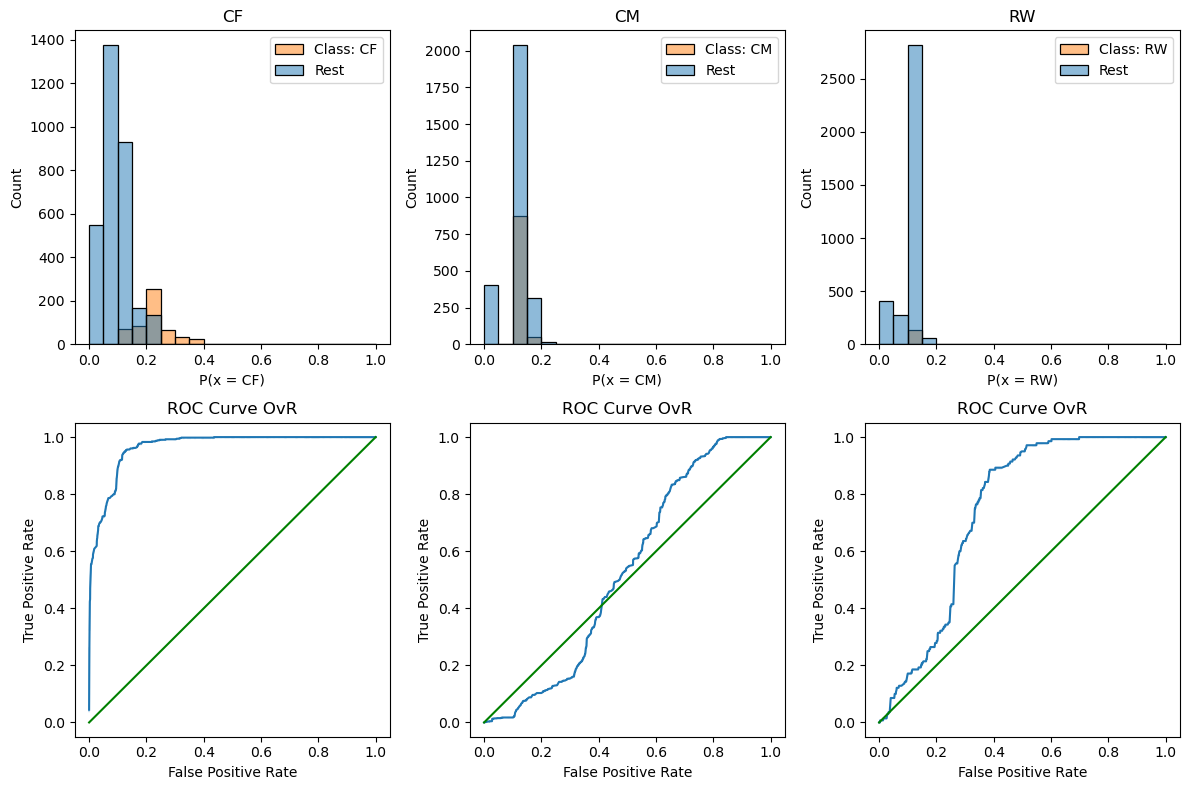

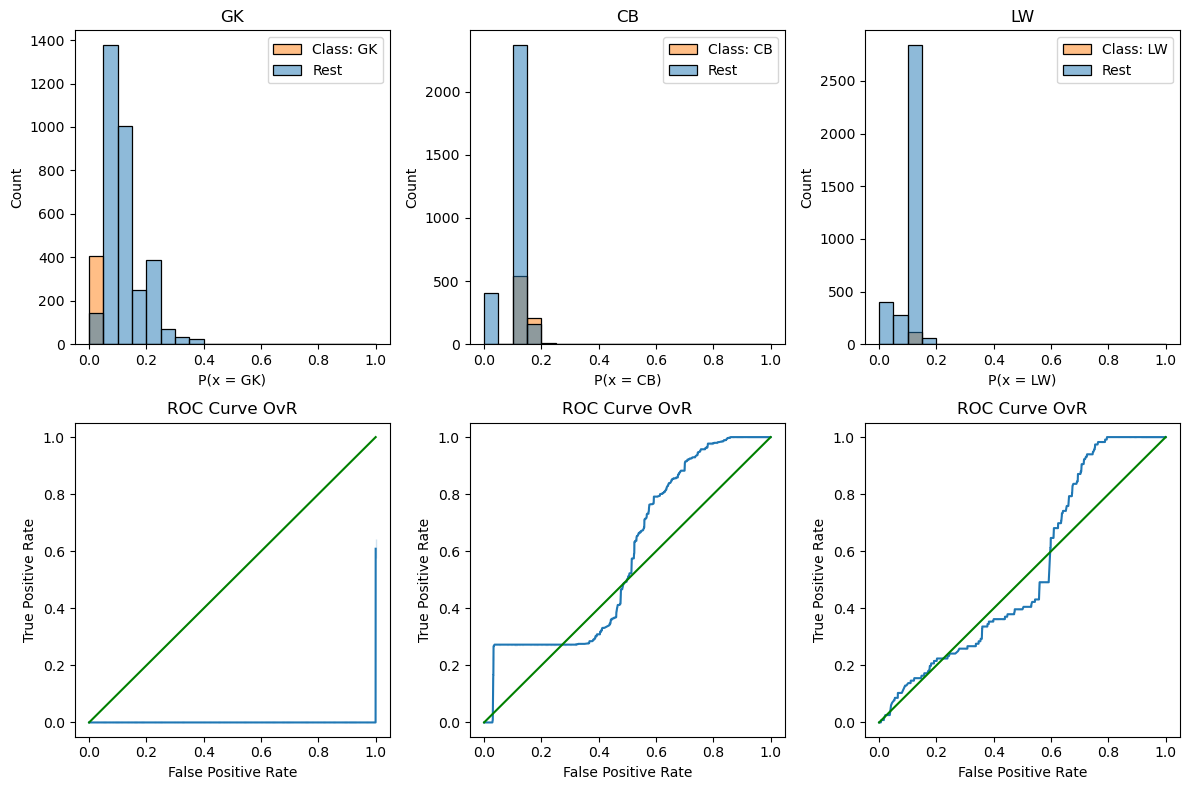

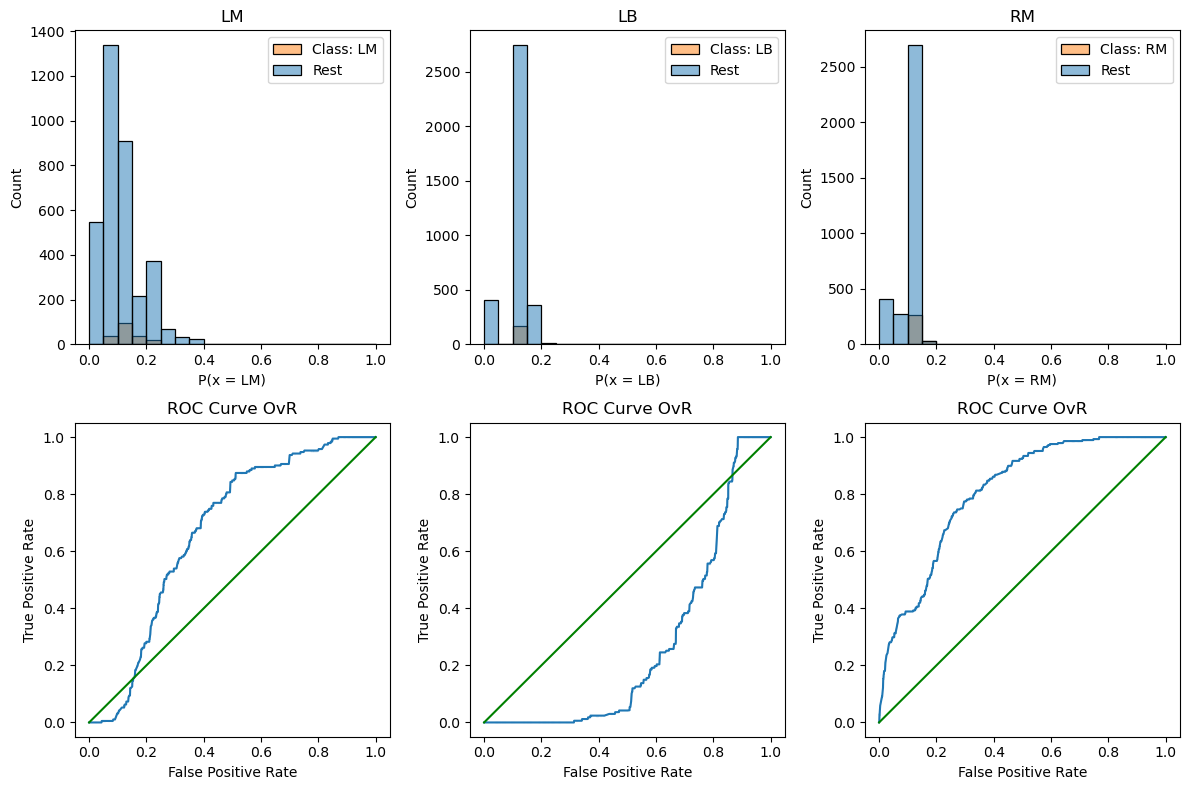

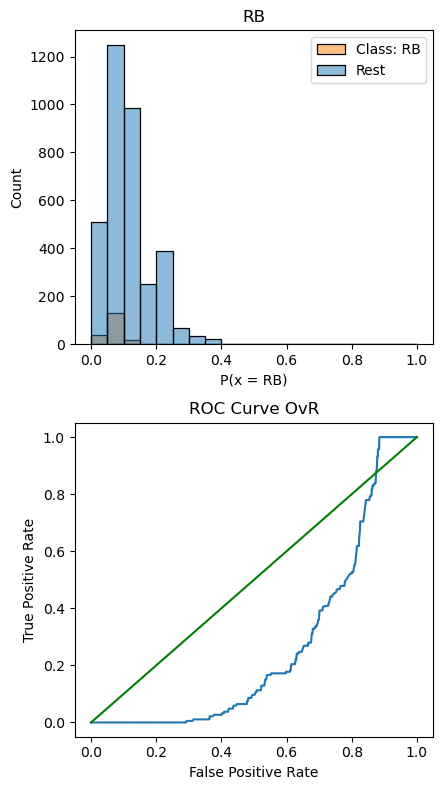

In [74]:
draw_pco(Y_Proba_ada, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_ada, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_ada, ['LM', 'LB','RM'])
draw_pco(Y_Proba_ada, ['RB'])

In [75]:
auc_score_ada = roc_auc_score(Y_Test, Y_Proba_ada, multi_class = 'ovr', average = 'macro')

In [76]:
models_auc_scores.append(auc_score_ada)

In [77]:
!pip install xgboost


# 5. XGB:

In [78]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [79]:
xgb.fit(X_Train, Y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [80]:
xgb.score(X_Train, Y_Train)

1.0

In [81]:
xgb.score(X_Test, Y_Test)

0.8246612466124661

In [82]:
Y_Pred_xgb = xgb.predict(X_Test)

In [83]:
models_names.append("XGB")
models_scores.append(xgb.score(X_Test, Y_Test))

In [84]:
classification_report_fun("XGB", Y_Test, Y_Pred_xgb)

The Classification Report for XGB Classifier:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       529
           1       0.82      0.93      0.87       921
           2       0.36      0.39      0.38       140
           3       1.00      1.00      1.00       404
           4       0.93      0.93      0.93       748
           5       0.38      0.26      0.31       116
           6       0.69      0.48      0.56       191
           7       0.69      0.80      0.74       167
           8       0.73      0.57      0.64       288
           9       0.62      0.62      0.62       186

    accuracy                           0.82      3690
   macro avg       0.72      0.69      0.70      3690
weighted avg       0.82      0.82      0.82      3690



# Use the ROC Curve and ROC AUC to Evaluate the model:¶

In [85]:
Y_Proba_xgb = xgb.predict_proba(X_Test)

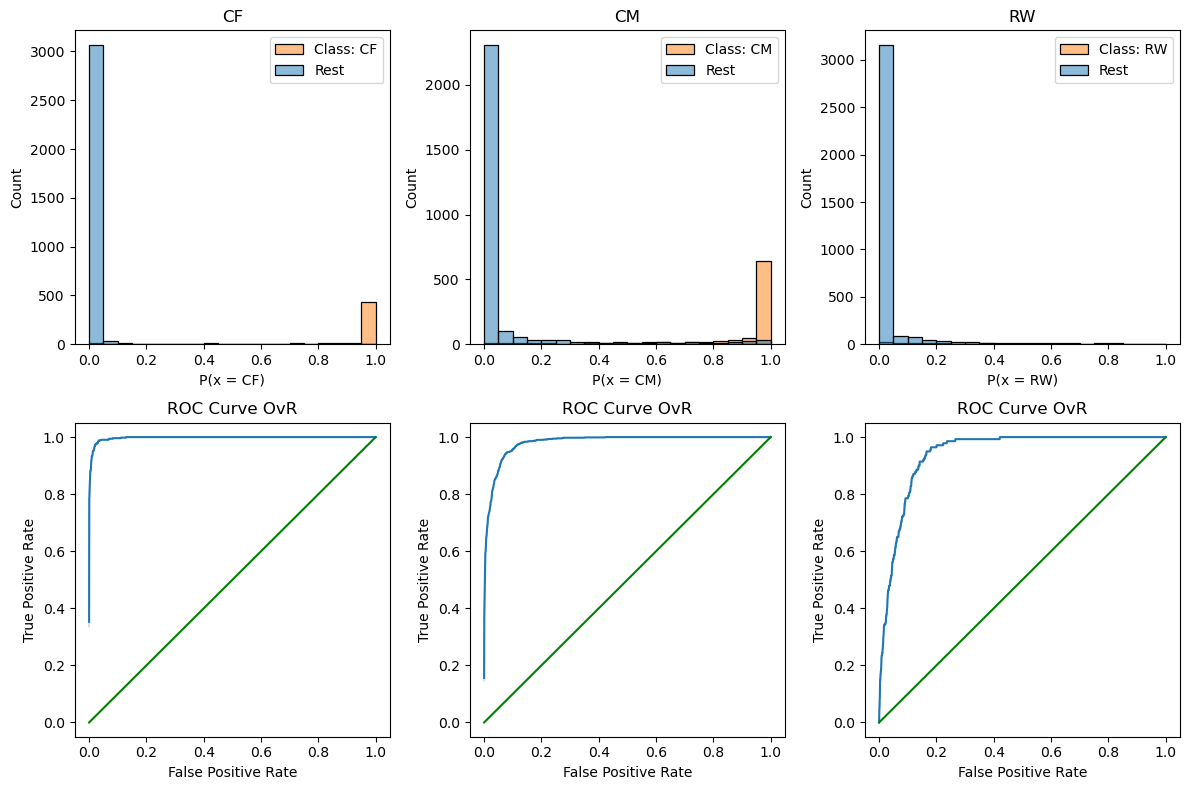

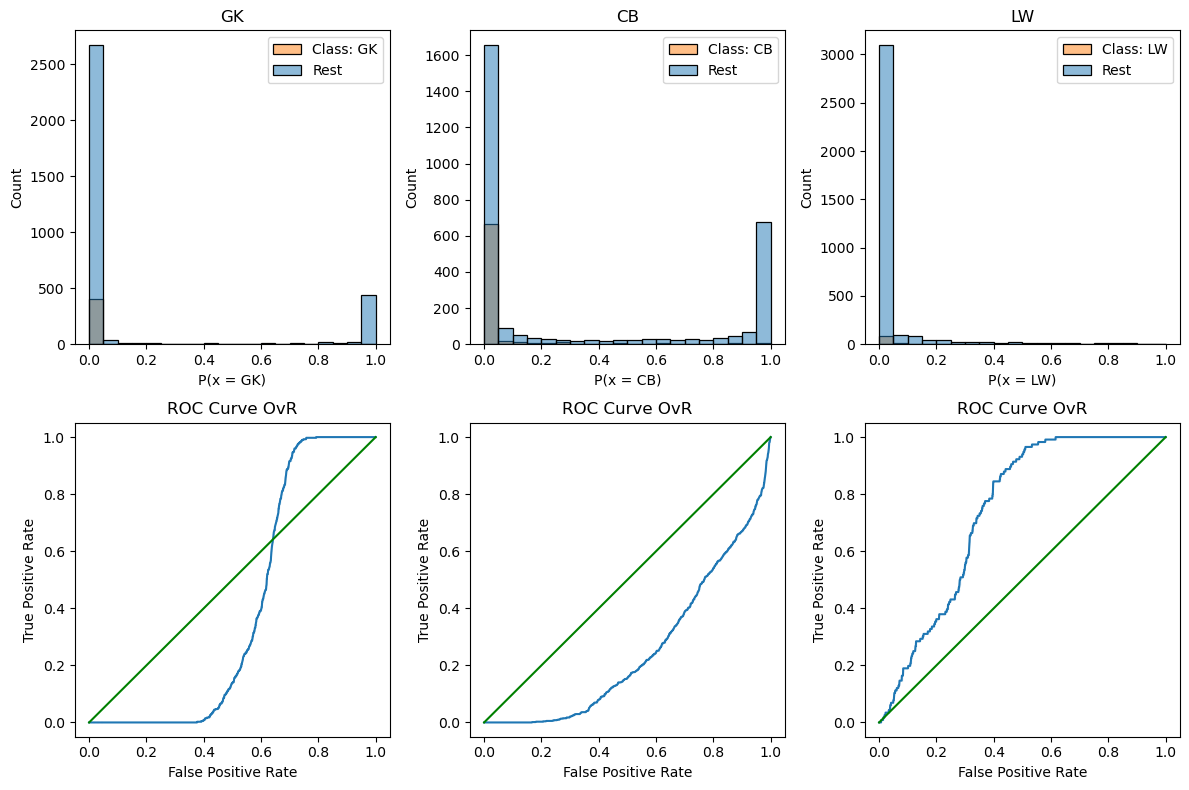

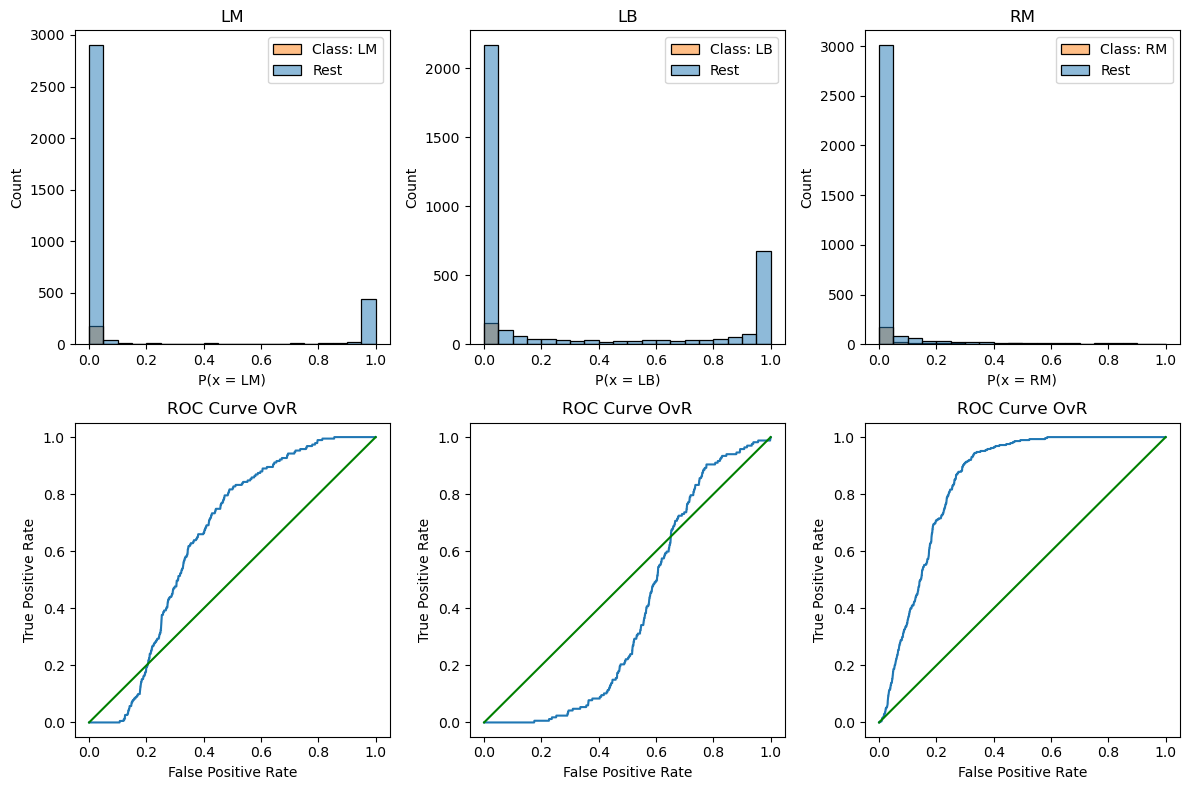

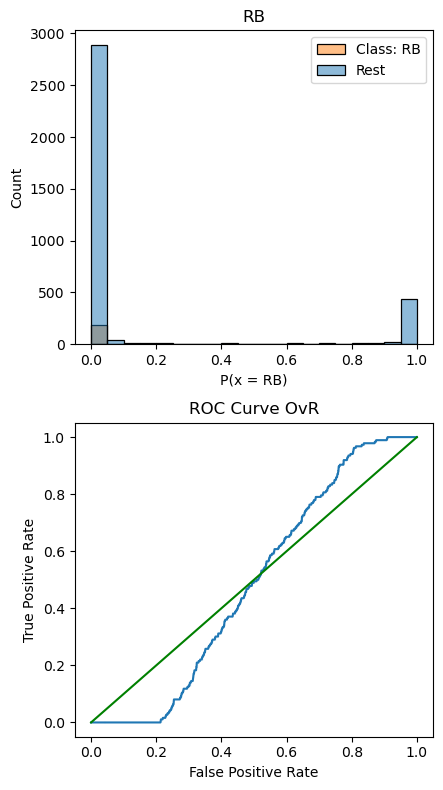

In [86]:
draw_pco(Y_Proba_xgb, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_xgb, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_xgb, ['LM', 'LB','RM'])
draw_pco(Y_Proba_xgb, ['RB'])

In [87]:
auc_score_xgb = roc_auc_score(Y_Test, Y_Proba_xgb, multi_class = 'ovr', average = 'macro')
auc_score_xgb

0.9747182554035382

In [88]:
models_auc_scores.append(auc_score_xgb)

In [89]:
!pip install lightgbm


# 6. light GBM:

In [90]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(max_depth = 15)

In [91]:
lgbm.fit(X_Train, Y_Train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4702
[LightGBM] [Info] Number of data points in the train set: 27916, number of used features: 61
[LightGBM] [Info] Start training from score -2.589169
[LightGBM] [Info] Start training from score -1.973107
[LightGBM] [Info] Start training from score -1.973107
[LightGBM] [Info] Start training from score -2.835724
[LightGBM] [Info] Start training from score -2.267252
[LightGBM] [Info] Start training from score -1.973107
[LightGBM] [Info] Start training from score -1.973107
[LightGBM

LGBMClassifier(max_depth=15)

In [92]:
lgbm.score(X_Train, Y_Train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.9998567129961312

In [93]:
lgbm.score(X_Test, Y_Test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.8165311653116532

In [94]:
Y_Pred_lgbm = lgbm.predict(X_Test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [95]:
models_names.append("light GBM")
models_scores.append(lgbm.score(X_Test, Y_Test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [96]:
classification_report_fun("light GBM", Y_Test, Y_Pred_lgbm)

The Classification Report for light GBM Classifier:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       529
           1       0.82      0.93      0.87       921
           2       0.34      0.43      0.38       140
           3       1.00      1.00      1.00       404
           4       0.92      0.94      0.93       748
           5       0.36      0.30      0.33       116
           6       0.63      0.55      0.59       191
           7       0.67      0.75      0.71       167
           8       0.77      0.46      0.57       288
           9       0.65      0.53      0.58       186

    accuracy                           0.82      3690
   macro avg       0.71      0.68      0.69      3690
weighted avg       0.81      0.82      0.81      3690



# Use the ROC Curve and ROC AUC to Evaluate the model:

In [97]:
Y_Proba_lgbm = lgbm.predict_proba(X_Test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


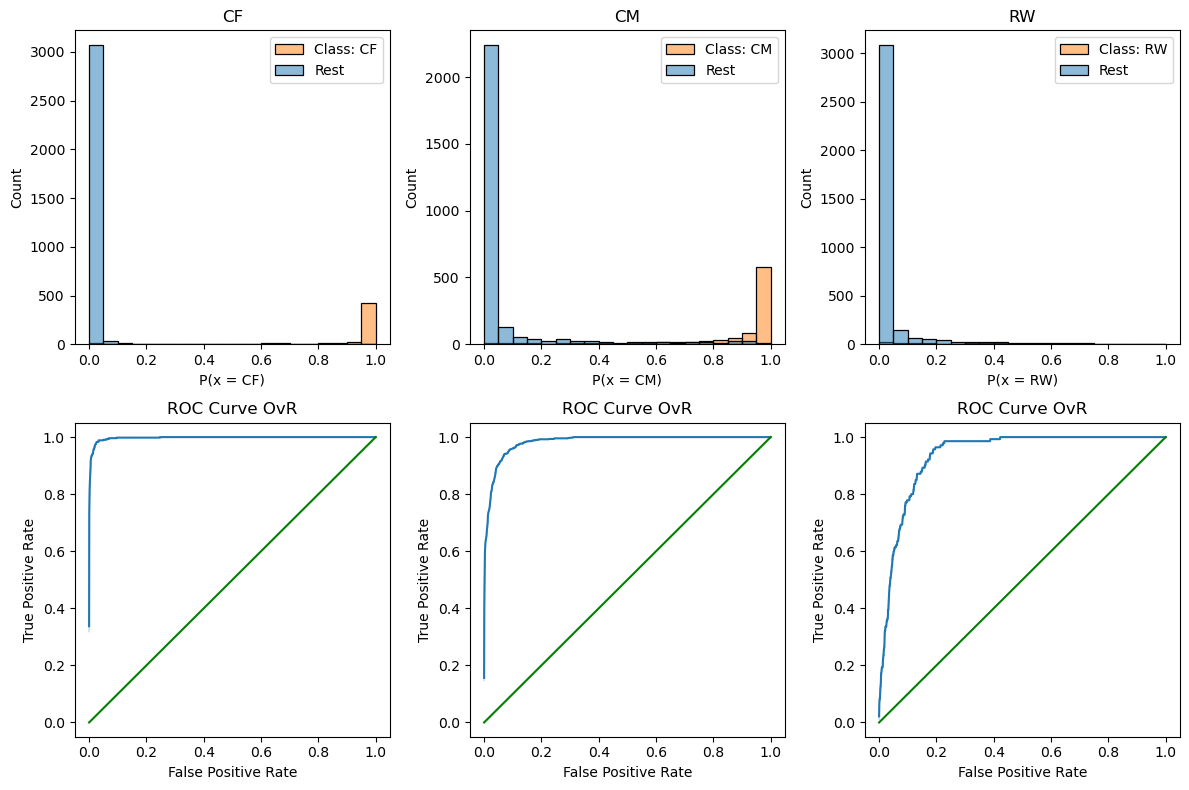

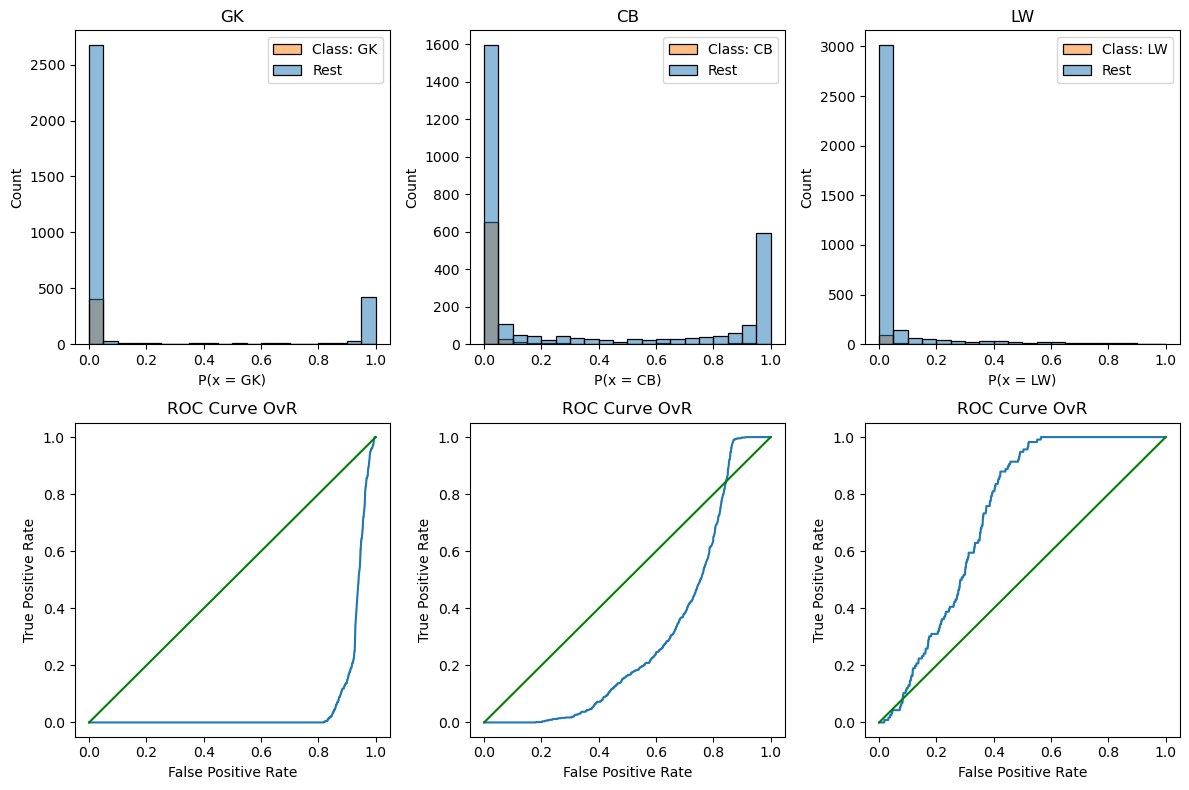

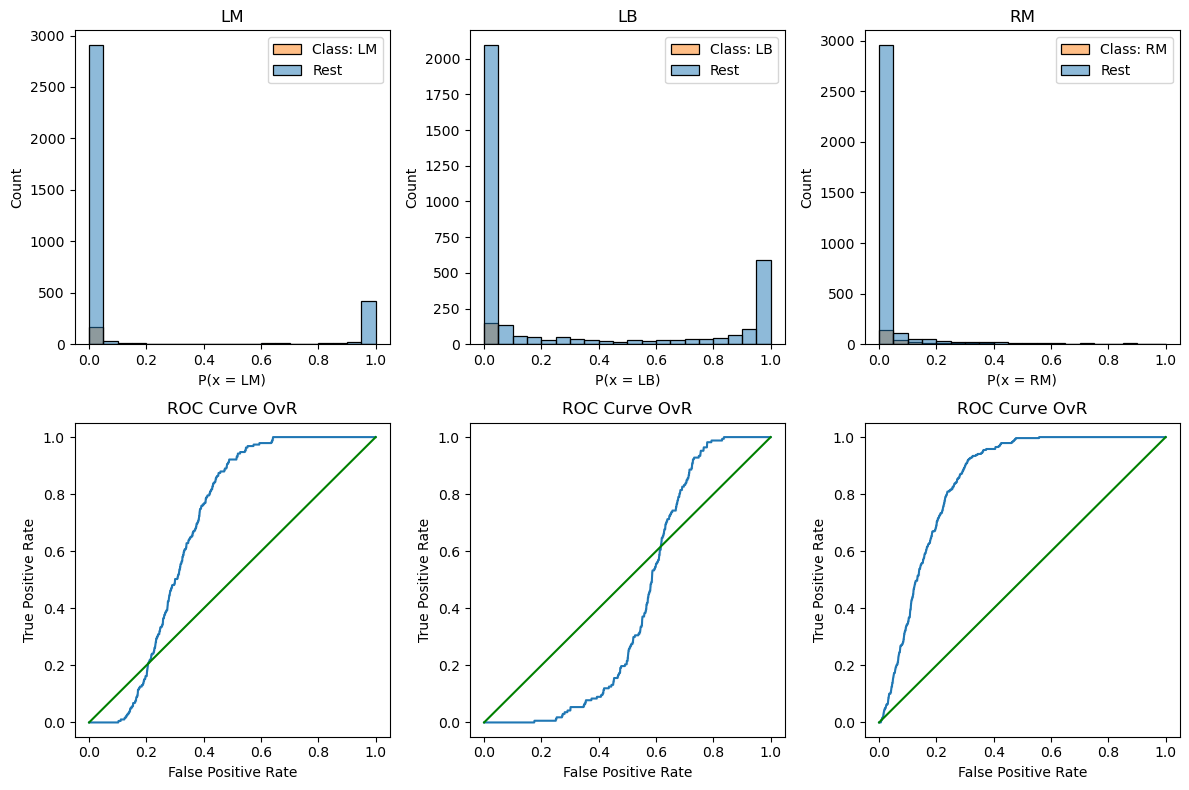

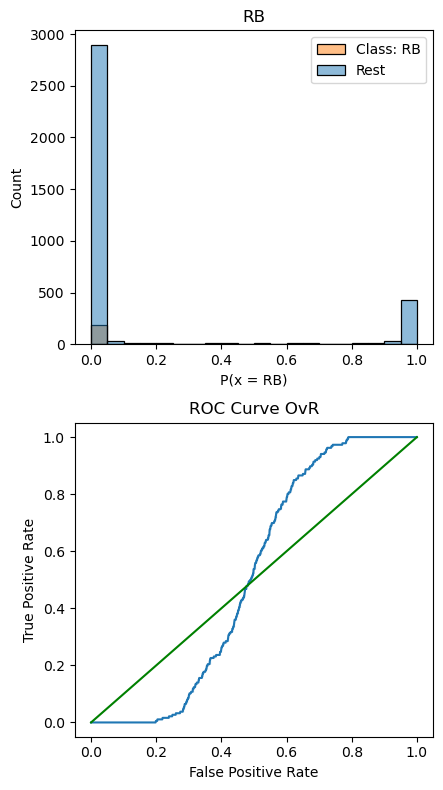

In [98]:
draw_pco(Y_Proba_lgbm, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_lgbm, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_lgbm, ['LM', 'LB','RM'])
draw_pco(Y_Proba_lgbm, ['RB'])

In [99]:
auc_score_lgbm = roc_auc_score(Y_Test, Y_Proba_lgbm, multi_class = 'ovr', average = 'macro')
auc_score_lgbm

0.9747058498730145

In [100]:
models_auc_scores.append(auc_score_lgbm)

# 7.KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)

In [102]:
knn.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=8)

In [103]:
knn.score(X_Train, Y_Train)

0.862659406791804

In [104]:
knn.score(X_Test, Y_Test)

0.6341463414634146

In [105]:
Y_Pred_knn = knn.predict(X_Test)

In [106]:
models_names.append("KNN")
models_scores.append(knn.score(X_Test, Y_Test))

In [107]:
classification_report_fun("KNN", Y_Test, Y_Pred_knn)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       529
           1       0.69      0.64      0.67       921
           2       0.15      0.44      0.22       140
           3       1.00      1.00      1.00       404
           4       0.94      0.77      0.84       748
           5       0.16      0.37      0.22       116
           6       0.28      0.51      0.36       191
           7       0.40      0.57      0.47       167
           8       0.61      0.16      0.25       288
           9       0.70      0.21      0.32       186

    accuracy                           0.63      3690
   macro avg       0.58      0.54      0.52      3690
weighted avg       0.73      0.63      0.66      3690



# Use the ROC Curve and ROC AUC to Evaluate the model:

In [108]:
Y_Proba_knn = knn.predict_proba(X_Test)

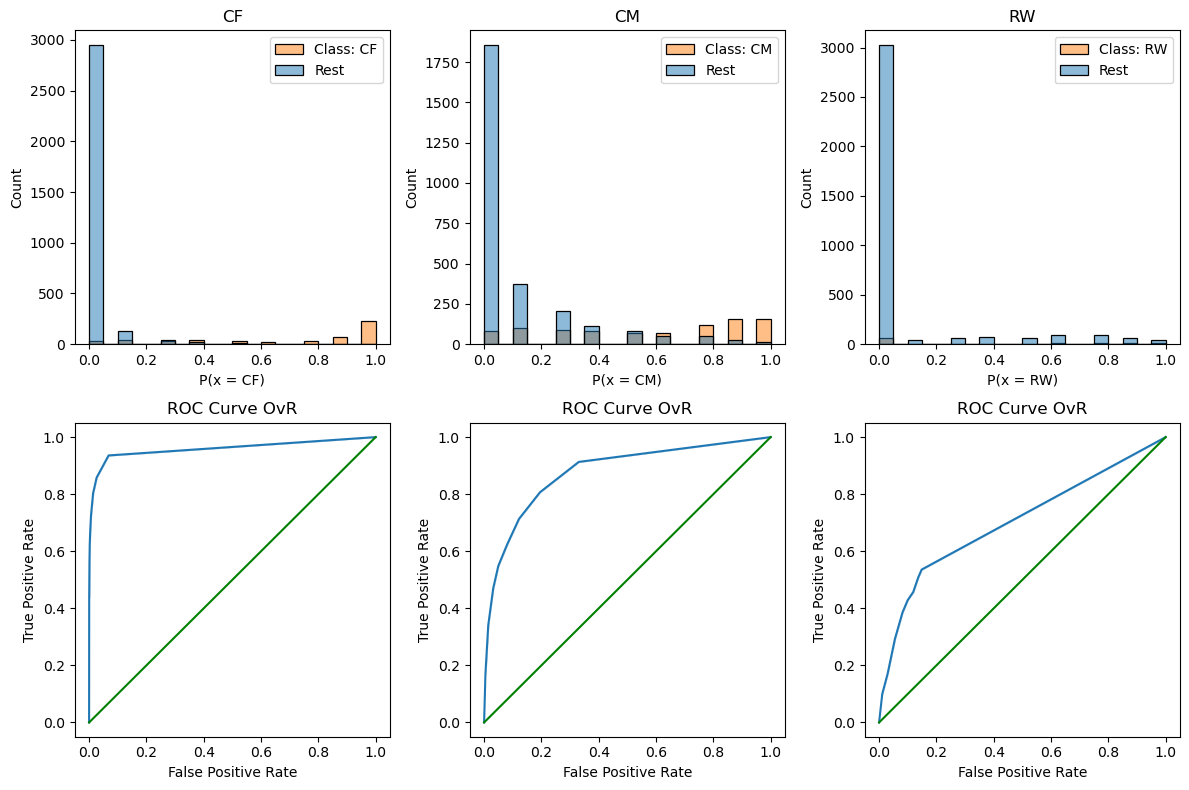

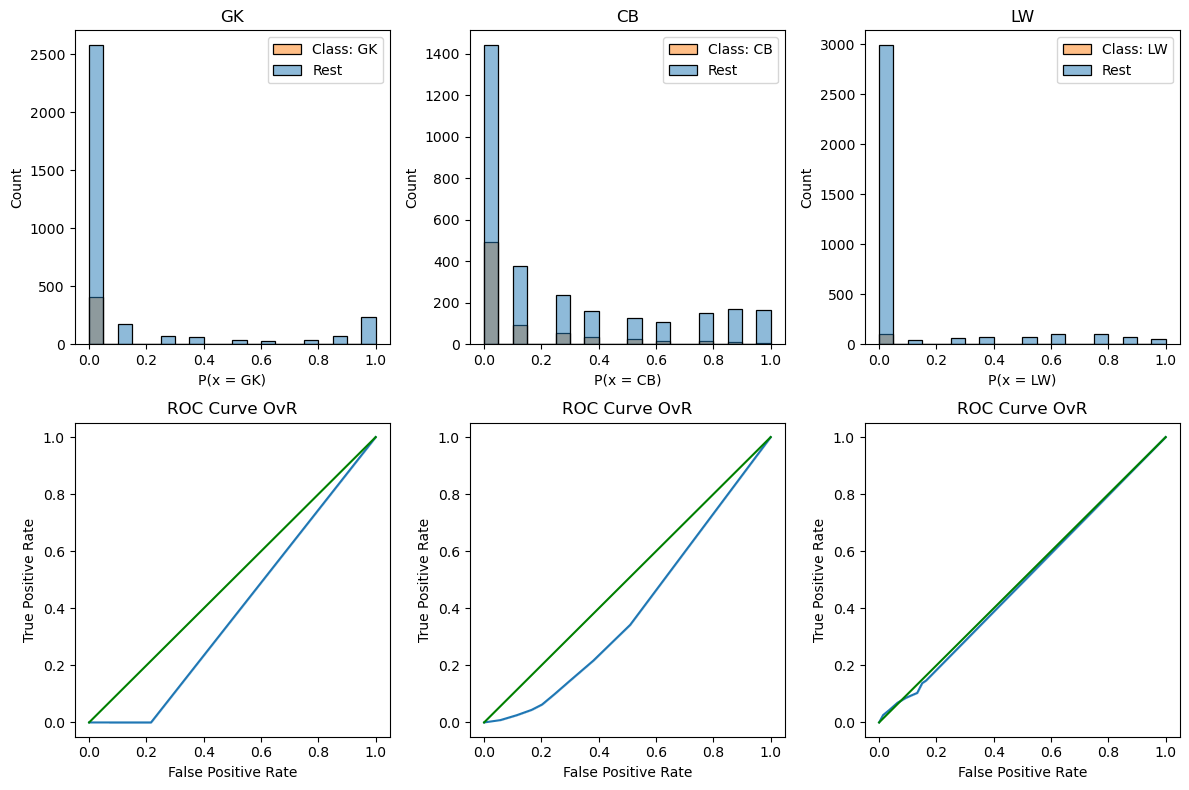

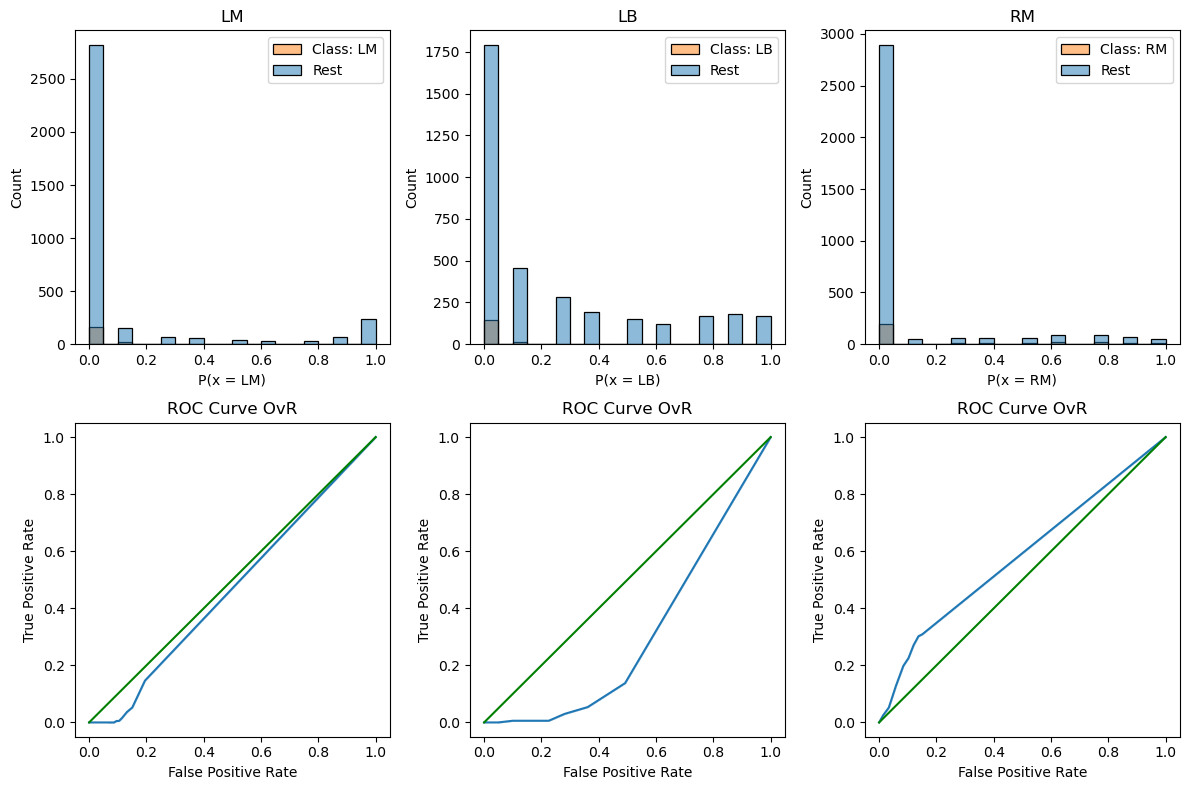

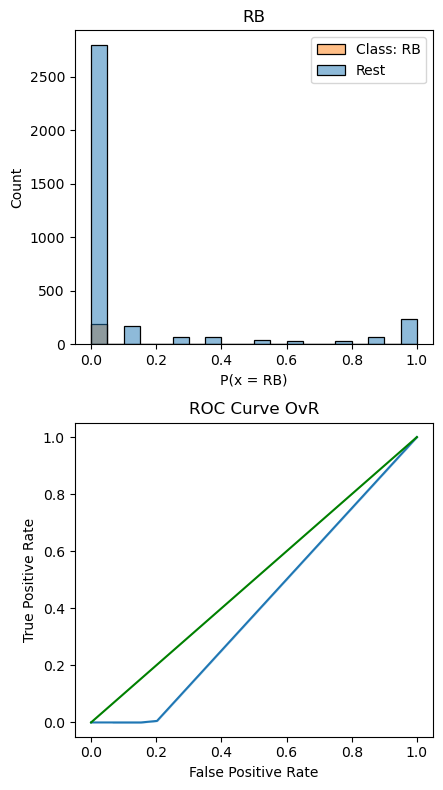

In [109]:
draw_pco(Y_Proba_knn, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_knn, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_knn, ['LM', 'LB','RM'])
draw_pco(Y_Proba_knn, ['RB'])

In [110]:
auc_score_knn = roc_auc_score(Y_Test, Y_Proba_knn, multi_class = 'ovr', average = 'macro')
auc_score_knn

0.8501865810218199

In [111]:
models_auc_scores.append(auc_score_knn)

# Compare the Test Accuracy of the 7 Classification Algorithms:


# Based on the Accuracy: 

In [112]:
comp = pd.DataFrame()
comp['name'] = models_names
comp['score'] = models_scores
comp

,name,score
0,Logistic Regression,0.766938
1,Random Forest,0.785637
2,Decision Tree,0.647696
3,Adaboost,0.603252
4,XGB,0.824661
5,light GBM,0.816531
6,KNN,0.634146


In [113]:
cm = sns.light_palette("green", as_cmap=True)
s = comp.style.background_gradient(cmap=cm)
s

,name,score
0,Logistic Regression,0.766938
1,Random Forest,0.785637
2,Decision Tree,0.647696
3,Adaboost,0.603252
4,XGB,0.824661
5,light GBM,0.816531
6,KNN,0.634146


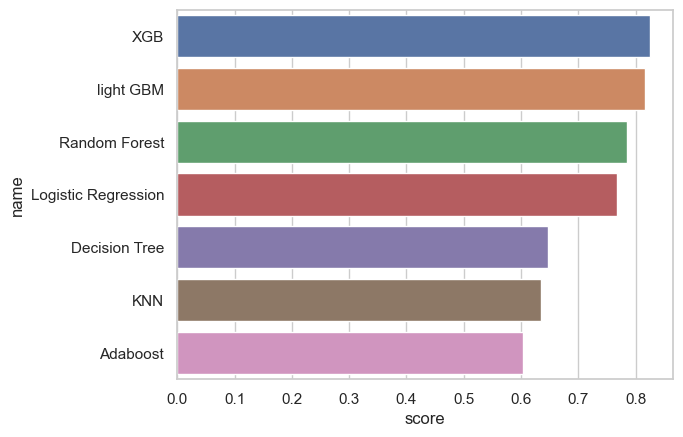

In [114]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp.sort_values(by="score", ascending=False))

# Based on the ROC AUC Score:

In [115]:
comp_auc = pd.DataFrame()
comp_auc['name'] = models_names
comp_auc['score'] = models_auc_scores
comp_auc

,name,score
0,Logistic Regression,0.964945
1,Random Forest,0.965108
2,Decision Tree,0.903235
3,Adaboost,0.839574
4,XGB,0.974718
5,light GBM,0.974706
6,KNN,0.850187


In [116]:
cm = sns.light_palette("green", as_cmap=True)
s = comp_auc.style.background_gradient(cmap=cm)
s

,name,score
0,Logistic Regression,0.964945
1,Random Forest,0.965108
2,Decision Tree,0.903235
3,Adaboost,0.839574
4,XGB,0.974718
5,light GBM,0.974706
6,KNN,0.850187


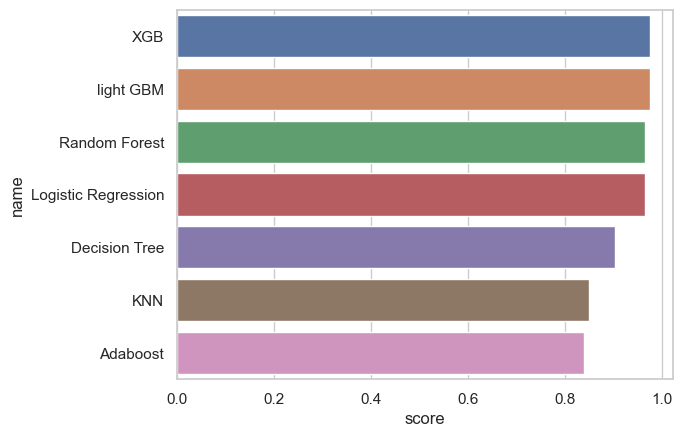

In [117]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp_auc.sort_values(by="score", ascending=False))

# Xgb is Classification Aglorithmm giving best result for this dataset

# Test the Algorithm on the top 20 Players:

In [118]:
top = pd.DataFrame(top)

for i in range(top.shape[0]):
    pred_pos = xgb.predict(top.iloc[[i]])[0]
    
    pred = list(mapping.keys())[list(mapping.values()).index(pred_pos)]
    true_pos = list(mapping.keys())[list(mapping.values()).index(top_pos.iloc[i])]

    print('Name: {}\nPrediction: {}\n True Best Pos: {}\n'.format(top_names.iloc[i], pred, true_pos))

Name: L. Messi
Prediction: CM
 True Best Pos: CM

Name: R. Lewandowski
Prediction: CF
 True Best Pos: CF

Name: K. De Bruyne
Prediction: CM
 True Best Pos: CM

Name: K. Mbappé
Prediction: CF
 True Best Pos: CF

Name: K. Benzema
Prediction: CF
 True Best Pos: CF

Name: M. Salah
Prediction: RW
 True Best Pos: RW

Name: T. Courtois
Prediction: GK
 True Best Pos: GK

Name: M. Neuer
Prediction: GK
 True Best Pos: GK

Name: Cristiano Ronaldo
Prediction: CF
 True Best Pos: CF

Name: V. van Dijk
Prediction: CB
 True Best Pos: CB

Name: S. Mané
Prediction: RW
 True Best Pos: LM

Name: N. Kanté
Prediction: CM
 True Best Pos: CM

Name: J. Kimmich
Prediction: CM
 True Best Pos: CM

Name: Ederson
Prediction: GK
 True Best Pos: GK

Name: Alisson
Prediction: GK
 True Best Pos: GK

Name: J. Oblak
Prediction: GK
 True Best Pos: GK

Name: Casemiro
Prediction: CB
 True Best Pos: CM

Name: H. Son
Prediction: RM
 True Best Pos: LW

Name: H. Kane
Prediction: CF
 True Best Pos: CF

Name: Neymar Jr
Prediction

# B. Group the Players in Clusters Based on their Similarities Using 4 Clustering Algorithms:

In [119]:
X_clus = data[data.Overall > 86] 
X_clus.shape


(43, 65)

In [120]:
names = X_clus["Name"].tolist() # saving names for later

X_clus = X_clus.drop(['Name', 'Nationality', 'ID'], axis = 1)

#Feature Scaling
X_clus = mms.fit_transform(X_clus)

# Perform Dimentionality Reduction:

In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # Reduce the Dimention of the Data to its half
X_clus = pd.DataFrame(pca.fit_transform(X_clus))

# Clustering:

In [122]:
clus_names = []
clus_scores = []

# 1. KMeans:
# Use the Elbow function to determine the optimal number of Clusters:

In [123]:
!pip install yellowbrick


In [124]:
import random
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

visualizer = KElbowVisualizer(KMeans(), timings=False)

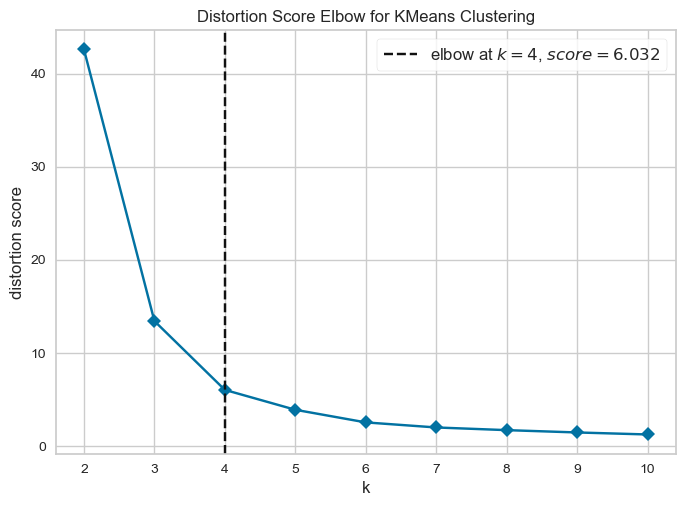

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [125]:
visualizer.fit(X_clus)
visualizer.show()

# So the Optimal number of clusters is 4

In [126]:
kmeans = KMeans(n_clusters=4)

kmeans = kmeans.fit(X_clus)

# get the cluster labels
labels = kmeans.predict(X_clus)

kmeans_clusters = kmeans.labels_.tolist()

In [127]:
X_kmeans = X_clus.copy()
X_kmeans['cluster'] = kmeans_clusters
X_kmeans['name'] = names
X_kmeans.columns = ['x', 'y', 'cluster', 'name']
X_kmeans.head()


,x,y,cluster,name
0,-1.271683,-1.648421,3,L. Messi
1,-0.975886,-1.192317,3,K. Benzema
2,-1.189627,-1.173911,3,R. Lewandowski
3,-1.600086,-0.517118,1,K. De Bruyne
4,-1.335628,-1.381503,3,K. Mbappé


# Plot the Clusters of the K-means Algorithm:

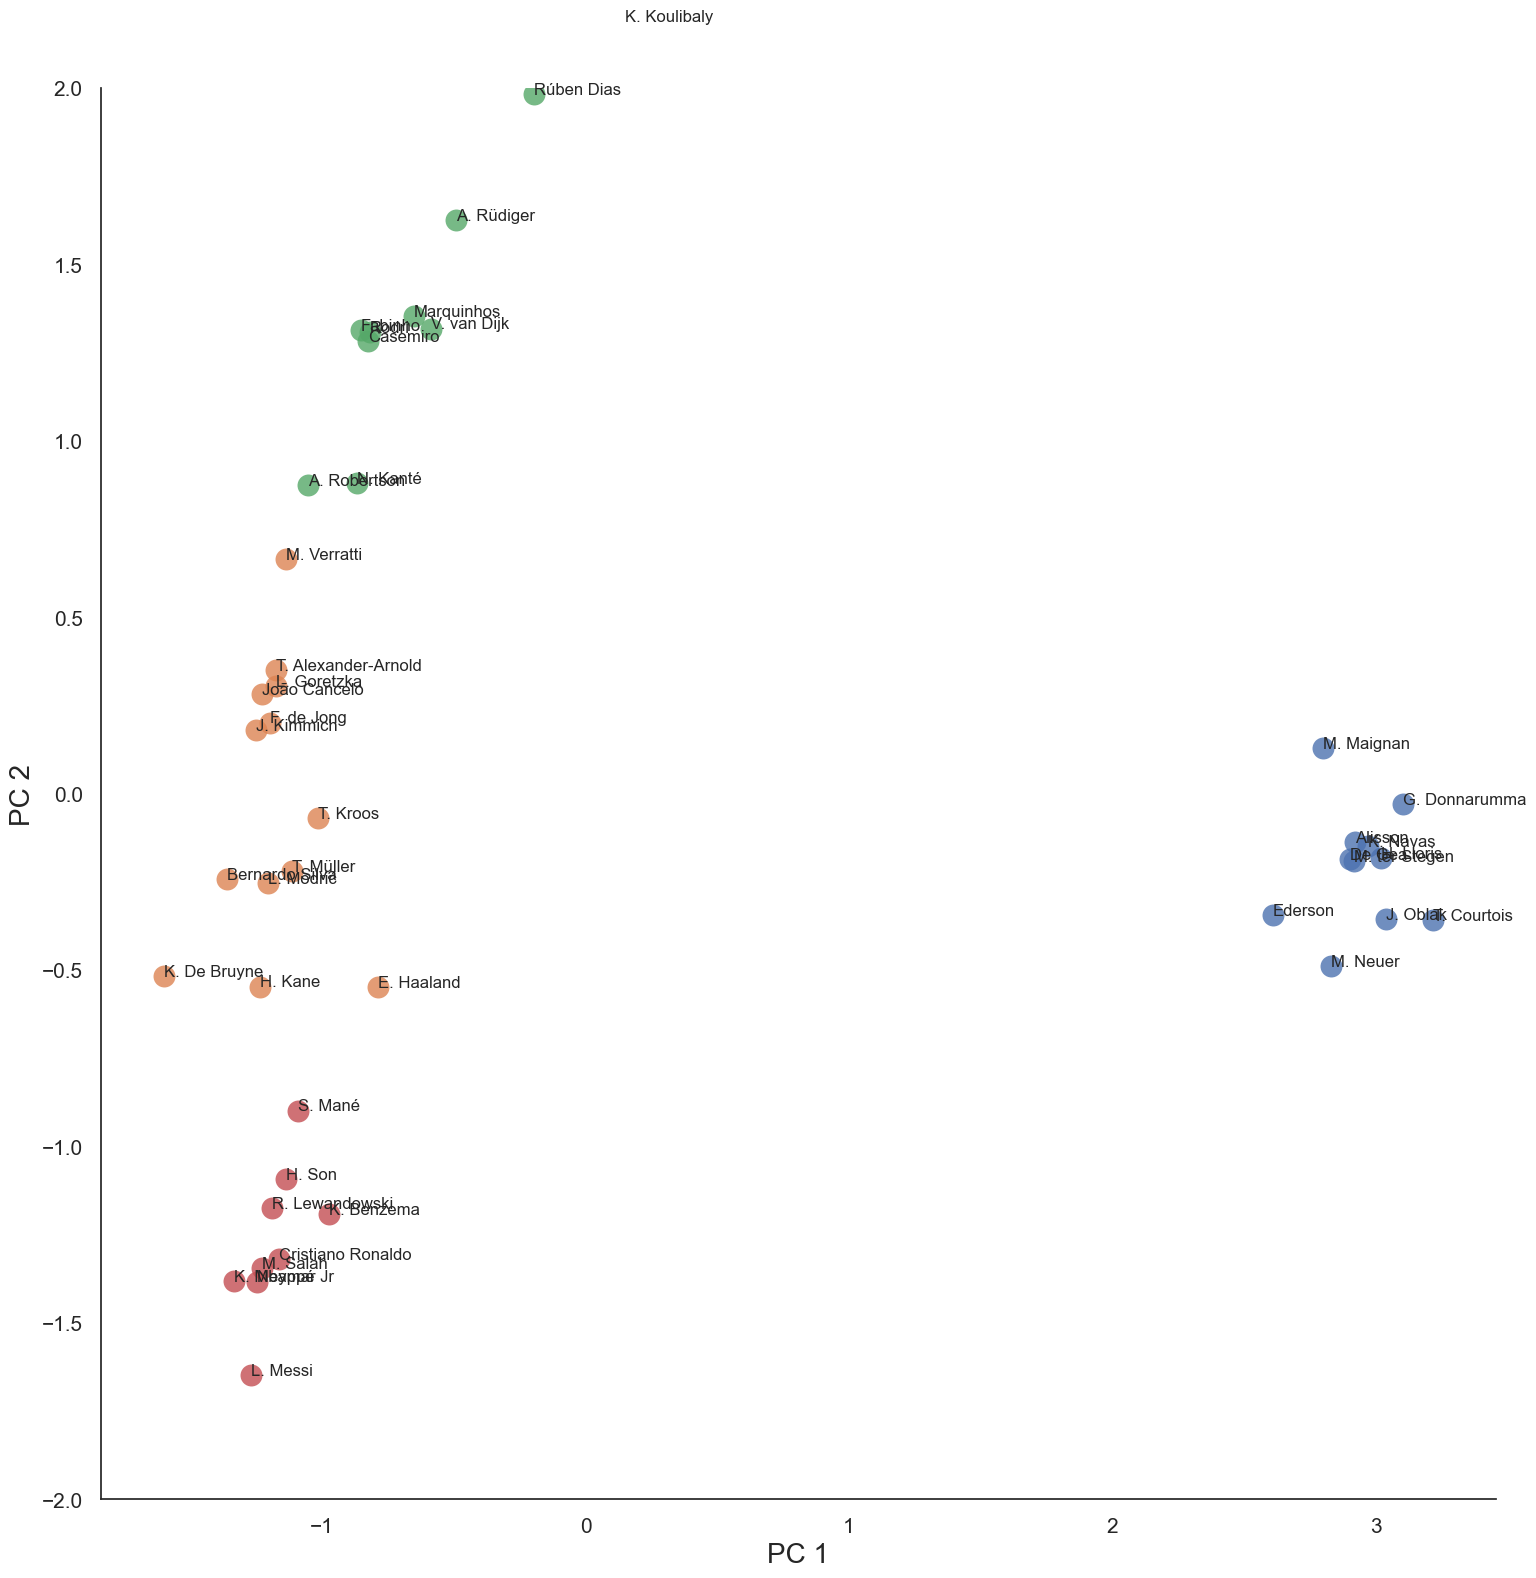

In [128]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_kmeans, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_kmeans.x, X_kmeans.y, X_kmeans.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()


# Evaluate the K-means algorithm using Silhouette coefficient:

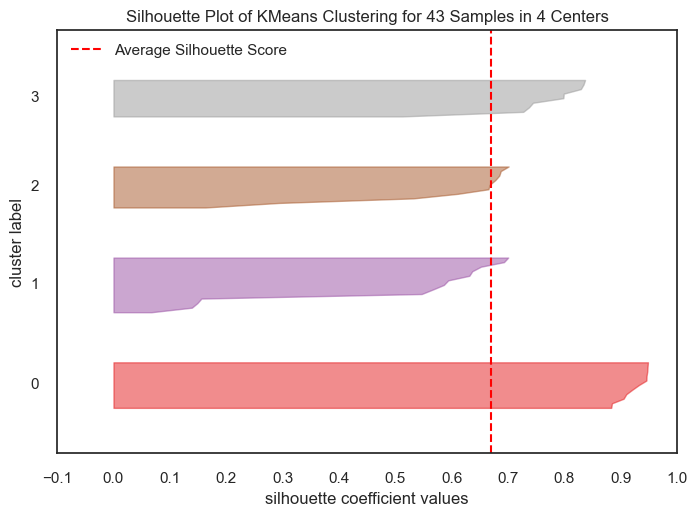

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 43 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [129]:
sil_visualizer = SilhouetteVisualizer(kmeans)
sil_visualizer.fit(X_clus)    
sil_visualizer.show()


In [130]:
silhouette_score(X_clus, kmeans.labels_)

0.6694690209060634

In [131]:
clus_names.append("K-means")
clus_scores.append(silhouette_score(X_clus, kmeans.labels_))

# 2. Hirerichal Clustering:

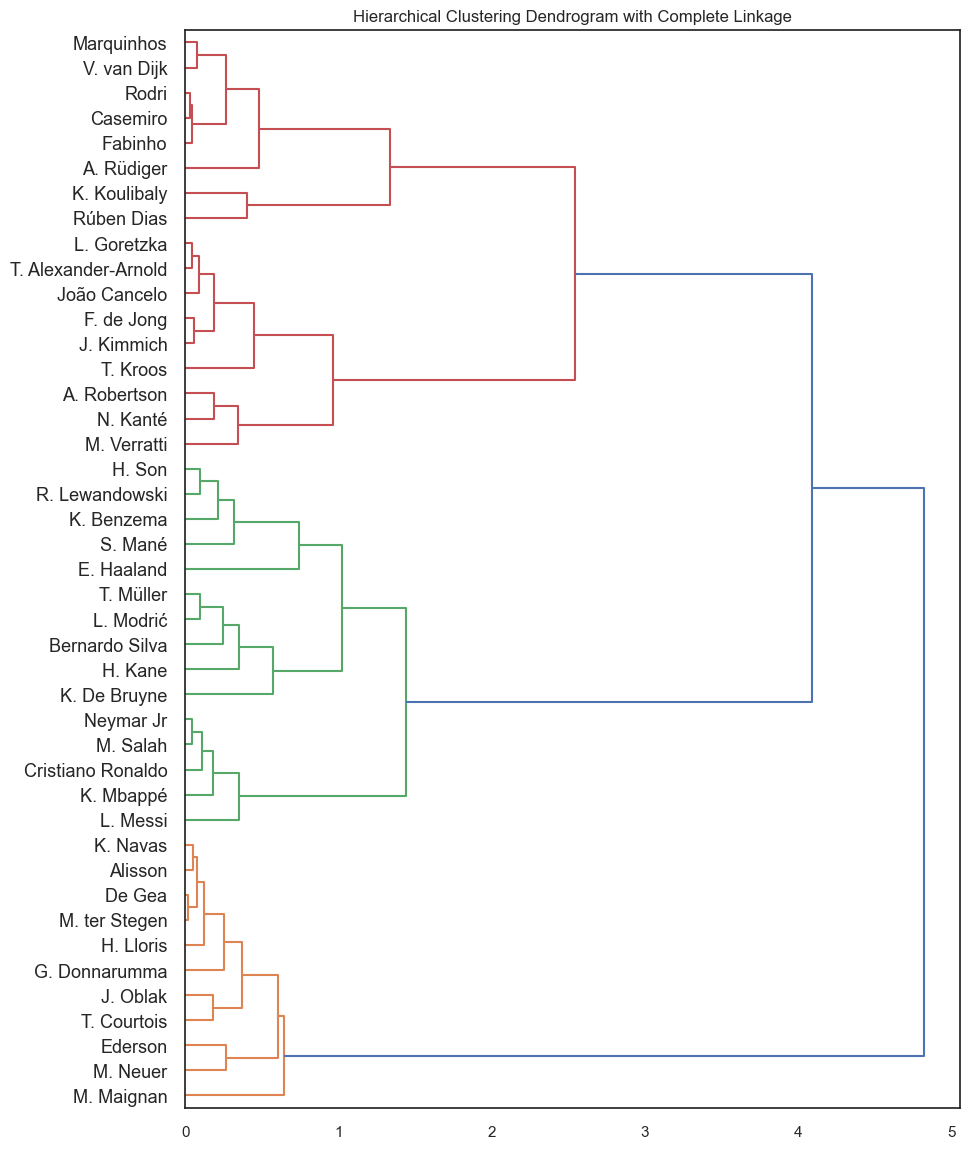

In [132]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_clus, method="complete"), labels= names, leaf_font_size = 13, orientation='right')

In [133]:
unique_colors = set(dendrogram['color_list'])
num_clusters_hir = len(unique_colors)
print("Optimal number of clusters is : ", num_clusters_hir)


Optimal number of clusters is :  4


In [134]:
from sklearn.cluster import AgglomerativeClustering
cluster_hir = AgglomerativeClustering(n_clusters=num_clusters_hir, affinity='euclidean', linkage='ward')
cluster_hir.fit_predict(X_clus)

# cluster values
hir_clusters = cluster_hir.labels_.tolist()


In [135]:
print("Estimated number of noise points:", list(cluster_hir.labels_).count(-1))

Estimated number of noise points: 0


In [136]:
X_hir = X_clus.copy()
X_hir['cluster'] = hir_clusters
X_hir['name'] = names
X_hir.columns = ['x', 'y', 'cluster', 'name']
X_hir.head()

,x,y,cluster,name
0,-1.271683,-1.648421,1,L. Messi
1,-0.975886,-1.192317,1,K. Benzema
2,-1.189627,-1.173911,1,R. Lewandowski
3,-1.600086,-0.517118,0,K. De Bruyne
4,-1.335628,-1.381503,1,K. Mbappé


# Plot the Clusters of the Hirerichal Clustering Algorithm:

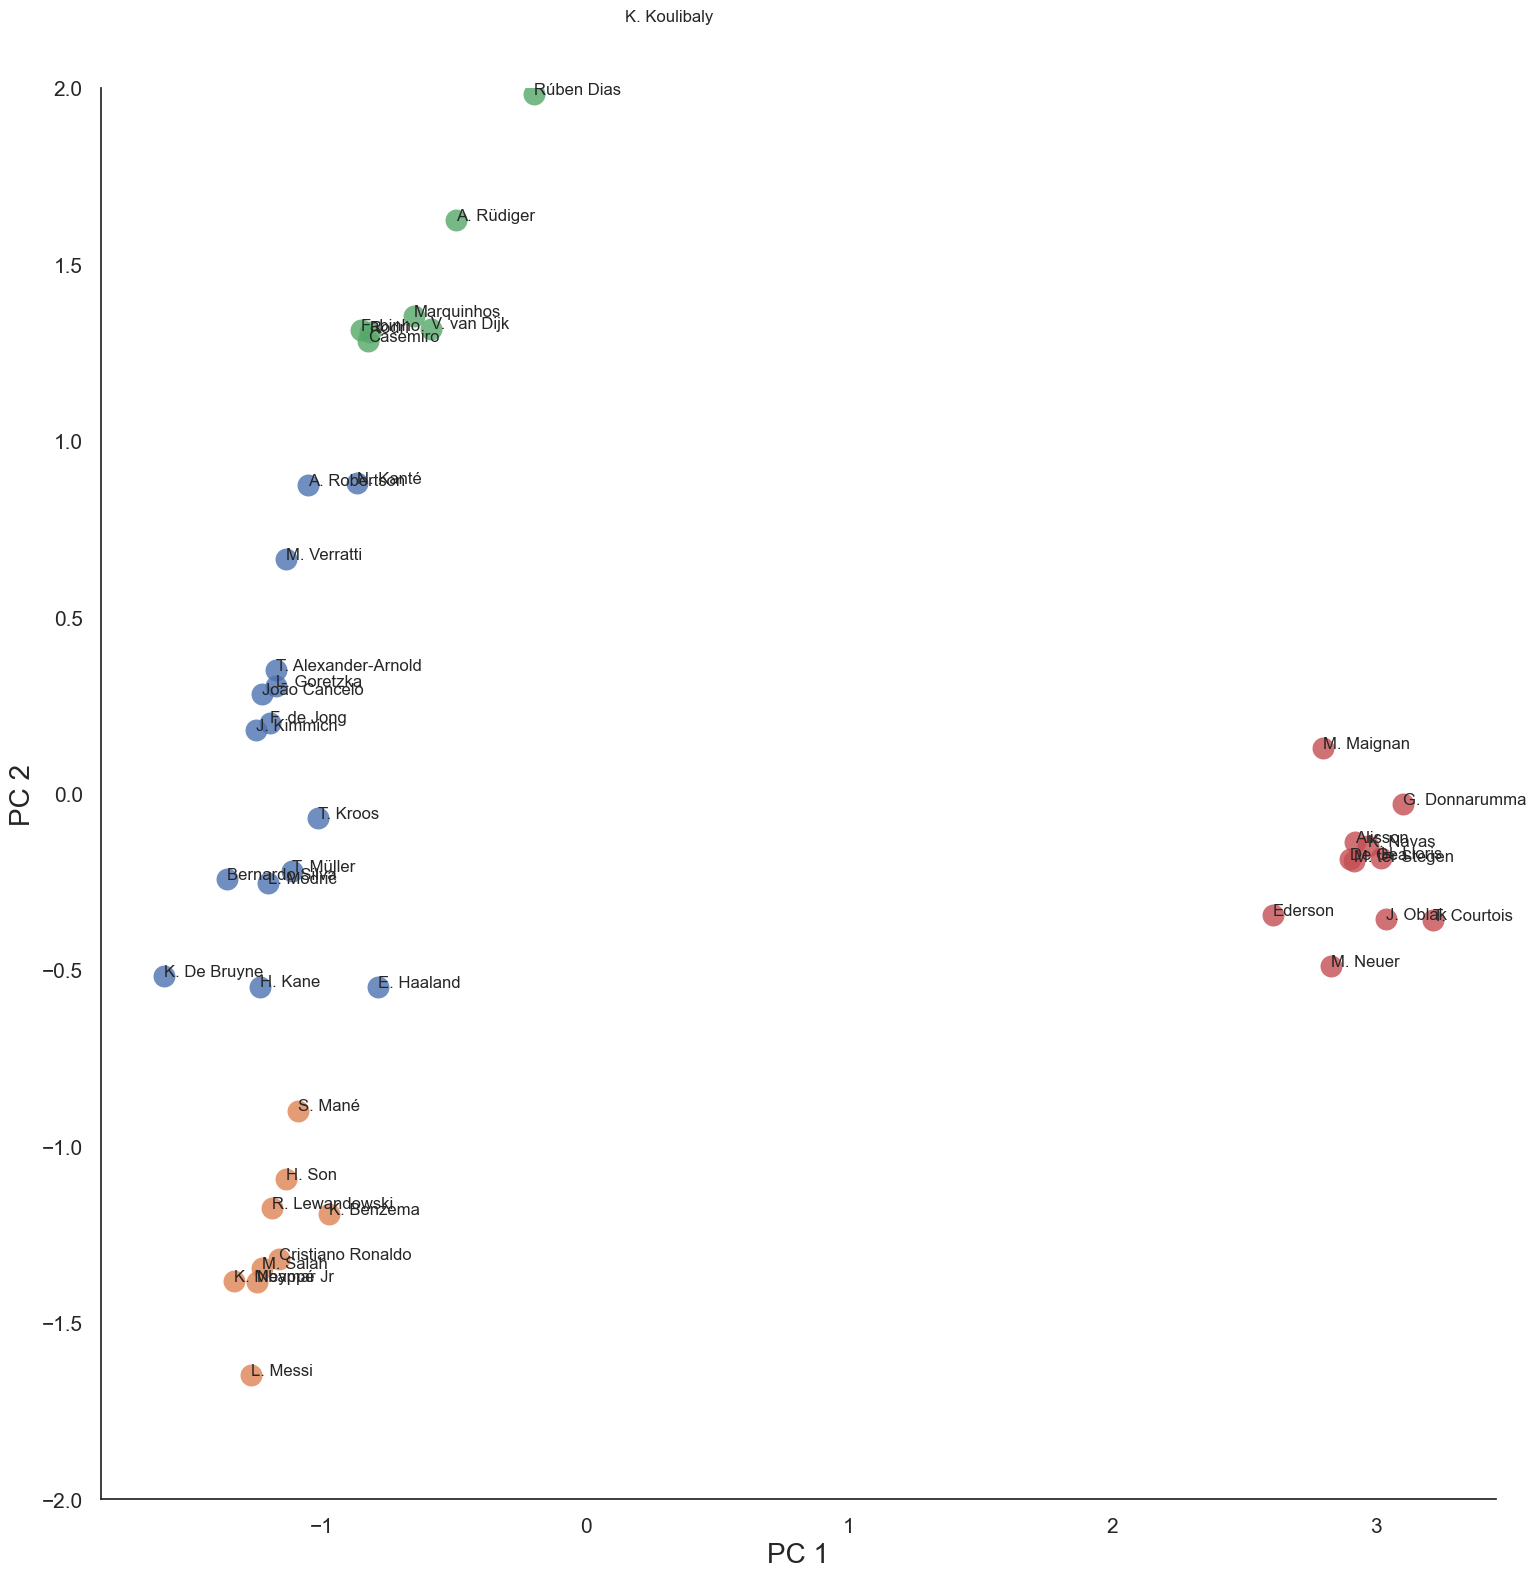

In [137]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_hir, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_hir.x, X_hir.y, X_hir.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

# Evaluate the Hirerichal Clustring algorithm using Silhouette coefficient:

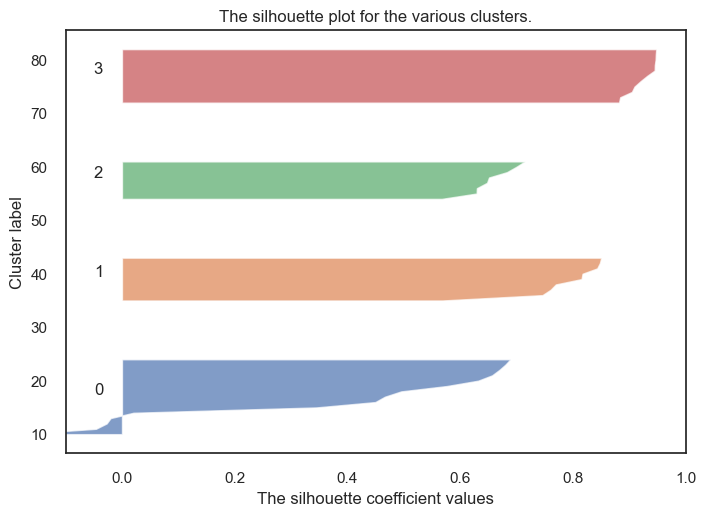

In [138]:
cluster_labels = cluster_hir.labels_
silhouette_avg = silhouette_score(X_clus, cluster_hir.labels_)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)

fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])


y_lower = 10
for i in range(num_clusters_hir):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


plt.show()

In [139]:
silhouette_score(X_clus, cluster_hir.labels_)

0.6467505864041748

In [140]:
clus_names.append("Hirerichal Clustering")
clus_scores.append(silhouette_score(X_clus, cluster_hir.labels_))

# 3. Density-based clustering (DBSCAN):

In [141]:
from sklearn.cluster import DBSCAN

# train the model using DBSCAN
db = DBSCAN(eps=0.429, min_samples=5)
db.fit_predict(X_clus)

# prediction for dbscan clusters
db_clusters = db.labels_.tolist()

In [142]:
print("Number of Cluster in the Density Based Clustering:", len(set(db_clusters)))

Number of Cluster in the Density Based Clustering: 4


In [143]:
X_db = X_clus.copy()
X_db['cluster'] = db_clusters
X_db['name'] = names
X_db.columns = ['x', 'y', 'cluster', 'name']
X_db.head()

,x,y,cluster,name
0,-1.271683,-1.648421,0,L. Messi
1,-0.975886,-1.192317,0,K. Benzema
2,-1.189627,-1.173911,0,R. Lewandowski
3,-1.600086,-0.517118,0,K. De Bruyne
4,-1.335628,-1.381503,0,K. Mbappé


Plot the Clusters of the DBSCAN Clustering Algorithm:

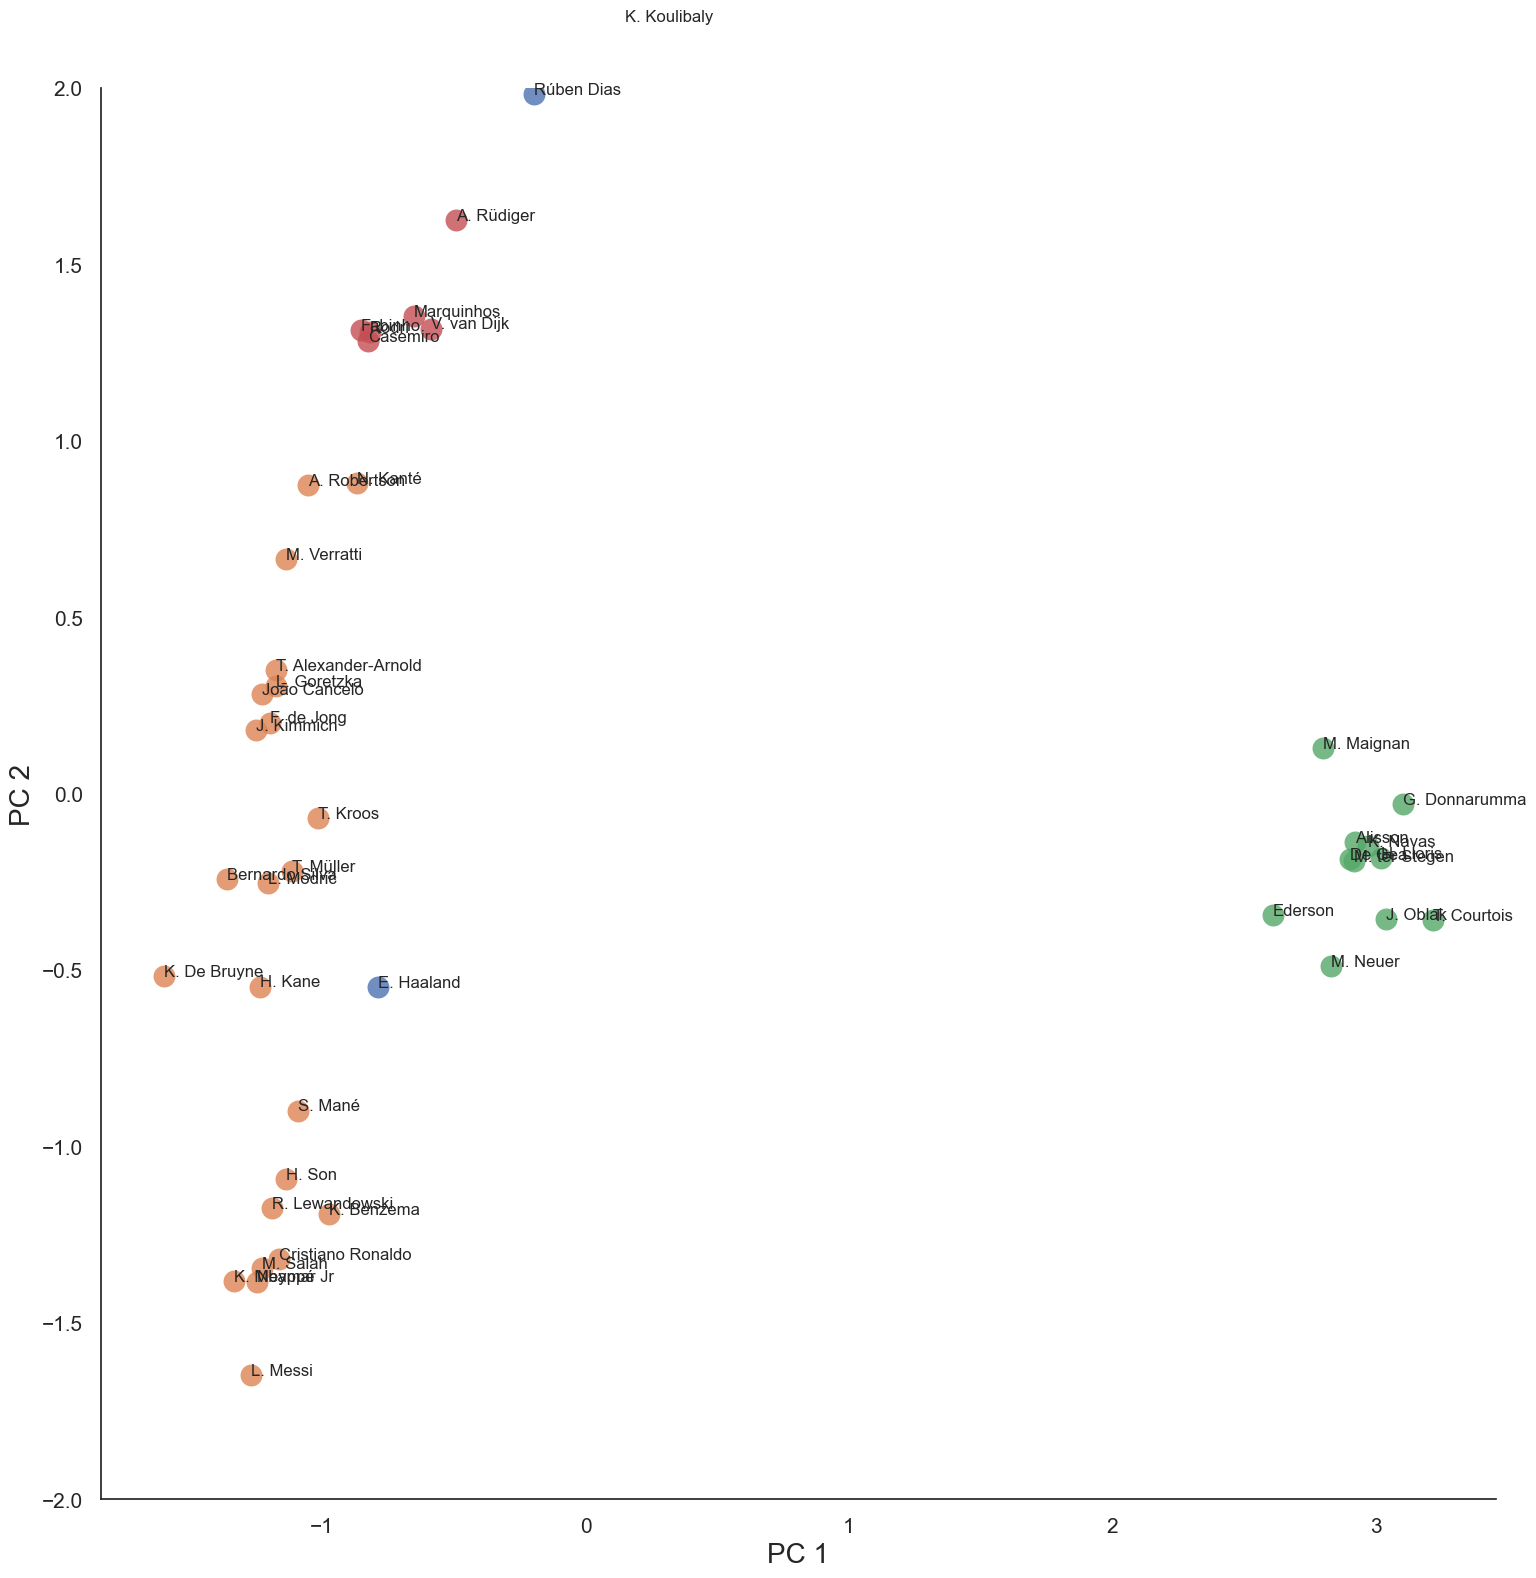

In [144]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_db, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_db.x, X_db.y, X_db.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

In [145]:
Evaluate the DBSCAN Clustring algorithm using Silhouette coefficient:

SyntaxError: invalid syntax (459615686.py, line 1)

In [ ]:
cluster_labels = db.labels_
silhouette_avg = silhouette_score(X_clus, db.labels_)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)
fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-1, 1])

num_clusters = len(set(db_clusters))
y_lower = 10
for i in range(-1, num_clusters-1):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

plt.show()

In [ ]:
silhouette_score(X_clus, db.labels_)

In [ ]:
clus_names.append("DBSCAN")
clus_scores.append(silhouette_score(X_clus, db.labels_))

# 4. Distribution-based clustering:

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X_clus)

gmm_clusters = gmm.predict(X_clus).tolist()

In [ ]:
X_gmm = X_clus.copy()
X_gmm['cluster'] = gmm_clusters
X_gmm['name'] = names
X_gmm.columns = ['x', 'y', 'cluster', 'name']
X_gmm.head()

# Plot the Clusters of the Distribution-based Clustering Algorithm:

In [ ]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_gmm, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_gmm.x, X_gmm.y, X_gmm.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

# Evaluate the Distribution-based Clustring algorithm using Silhouette coefficient:

In [ ]:
cluster_labels = np.array(gmm_clusters)
silhouette_avg = silhouette_score(X_clus, cluster_labels)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)
fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])

num_clusters = len(set(gmm_clusters))
y_lower = 10
for i in range(num_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
plt.show()

In [ ]:
silhouette_score(X_clus, cluster_labels)

In [ ]:
clus_names.append("Distribution-based")
clus_scores.append(silhouette_score(X_clus, cluster_labels))

# Compare the 4 Clustring Algorithms based on the Silhouette Score:

In [ ]:
comp = pd.DataFrame()
comp['name'] = clus_names
comp['score'] = clus_scores
comp


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = comp.style.background_gradient(cmap=cm)
s

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp.sort_values(by="score", ascending=False))


# So Based on The Silhouette Score, The Hirerichal Clustring and the K-means are the best Clustering Algorithms for this Data.